# Main Script



----
###  ATTENZIONE 
### Ricordiamoci di committare nella cartella pickle_saves/models anche il modello 'RFR.save' (2.5gb) non l'abbiamo committato perche troppo grande
___

In [ ]:
%pip uninstall tensorflow-tensorboard -y
%pip uninstall tensorflow -y
%pip uninstall tensorflow-intel -y
%pip uninstall tensorboard -y
%pip uninstall seaborn -y
%pip uninstall keras -y
%pip uninstall pytorch_tabular -y
%pip uninstall pytorch-tabnet -y
%pip uninstall tab-transformer-pytorch -y
%pip uninstall torch -y
%pip uninstall torchvision -y
%pip uninstall torchaudio -y
%pip uninstall Pillow -y

#### Needed Imports

In [ ]:
#----------------- DA TOGLIERE-----|> BASTA ESEGUIRE IL FILE requirements.txt (apri terminale -> pip install -r requirements.txt (per testare prova ad eseguire la cella degli imports))
%pip uninstall tensorflow-tensorboard
%pip uninstall tensorflow tensorflow-intel tensorboard -y

%pip install seaborn
%pip install  keras
%pip install  tensorflow
%pip install tensorflow-intel
%pip install tensorboard
#%pip install --upgrade tensorboard
%pip install pytorch_tabular pytorch-tabnet tab-transformer-pytorch
#%pip install torch torchvision torchaudio #Only CPU
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 #CUDA 11.8
%pip install Pillow

In [9]:
#Import delle Librerie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cProfile import label
from scipy.stats import iqr
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
# import tensorflow as tf
# from tensorflow import keras
# from keras.layers import Dense
# from keras.models import Sequential
# from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split
import pickle
from pickle import dump
import random
import os
import numpy as np
import torch
from torch import nn
from torch.utils.data import  DataLoader
from torch.utils.tensorboard.writer import SummaryWriter
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from pytorch_tabular import TabularModel
from pytorch_tabular.models import TabNetModelConfig  # Importa TabNet
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular.tabular_model_tuner import TabularModelTuner
import torch
import torch.nn as nn
from sklearn.model_selection import ParameterSampler
import random
import hashlib


## Load Data

In [2]:
# CSV zip folder's path
csv_file_name = 'data.zip'

# loading data from csv
data = pd.read_csv(csv_file_name)

---
1

## Describing data

In [11]:
len(data)

252175

In [126]:
data

Year        S0         S1         S2        S3        S4        S5  \
0       2007  44.76752  114.82099    3.83239  27.99928   1.49153 -15.90853   
1       2004  52.28942   75.73319   11.35941  -6.20582 -27.64559 -30.75995   
2       2005  33.81773 -139.07371  134.19332  17.85216  63.47408 -25.28005   
3       1998  41.60866    3.17811   -3.97174  23.53564 -19.68553  20.74407   
4       1987  44.49525  -32.25270   58.08217   3.73684 -32.53274 -18.72885   
...      ...       ...        ...        ...       ...       ...       ...   
252170  1993  46.19915   12.97202   29.32321  12.49879 -14.88763 -14.60964   
252171  2008  45.57508  -30.83634   -9.13791   7.80413  -0.41150  -2.97301   
252172  1979  48.18397  -19.28290   35.40170  -4.43572 -35.35641  -1.80437   
252173  1995  29.99863  -35.84167   58.65438  21.15740  17.93387  25.19035   
252174  1988  38.77358   28.76751    3.20268  -3.45853 -24.13094 -16.15170   

              S6        S7        S8  ...       S80        S81        S82  \
0       28.24844   3.61650  -7.24653  ...  -1.89619 -471.02844  411.56205   
1       12.50955   7.47877   9.88498  ...   4.57060    1.36110   -6.52977   
2      -34.65911  -5.99135   1.27848  ...  54.16608   15.04530   39.09107   
3       18.80866   6.24474  -7.98424  ...  28.08591  295.88684   54.02395   
4      -15.85665  -3.34607  22.63786  ...  31.44988 -136.50457  -85.11989   
...          ...       ...       ...  ...       ...        ...        ...   
252170  -9.07813  -4.77650  14.45143  ...   5.18055  -68.43144 -255.37766   
252171   2.22720 -15.02186   5.78416  ...  -5.11588  -29.11996   43.99473   
252172  -2.59621  -0.31640  -0.13533  ...  12.08210 -101.94608  104.57106   
252173 -27.95186  14.64049 -10.70063  ...  32.86108 -324.89056  109.56178   
252174  -6.12772  -9.97229  18.25481  ... -23.72540   13.57308  -75.19978   

              S83       S84        S85        S86       S87        S88  \
0       443.01198  19.30254  309.07806 -336.91706 -14.70547 -474.44157   
1        59.48672   3.69790  -36.92252   44.08077   3.39993  -70.07591   
2        39.03041   3.68708  -61.88547   45.68115   6.39822    3.24471   
3       102.02880  40.47711   15.10258 -250.32293   2.81288   56.05172   
4       -74.96342   9.56921 -100.61689 -133.29315   9.19246  -97.37953   
...           ...       ...        ...        ...       ...        ...   
252170  -19.92673 -20.46062  -64.44939 -564.09909  13.39130 -126.59750   
252171  172.10433  27.92205  -25.05652 -176.00554  11.80790 -217.53687   
252172   56.94138  -6.47794   32.00236  -91.34596  -3.85441   63.39848   
252173  133.21987  -8.94126  159.61415  175.69657   7.00635 -102.02967   
252174   43.74653   5.05338  100.37312 -176.40529  17.35391  104.51010   

             S89  
0       31.32820  
1        3.86143  
2       35.74749  
3        3.60432  
4       30.11015  
...          ...  
252170  34.17522  
252171 -37.22642  
252172  -5.69944  
252173  16.69539  
252174 -34.71013  

[252175 rows x 91 columns]

In [3]:
#print shape of dataset
print("Dataset shape:",data.shape) #25175 rows, 91 columns. We know that the label Y ('year) is the first one column.

# saving data without first column 'year'
no_target_column_data = data[data.columns[1:]]
no_target_column_data.describe()

Dataset shape: (252175, 91)


S0             S1             S2             S3  \
count  252175.000000  252175.000000  252175.000000  252175.000000   
mean       43.379379       1.555258       8.643927       1.160078   
std         6.066547      51.551085      35.235495      16.336577   
min         3.455260    -334.953220    -301.005060    -149.962040   
25%        39.959775     -25.651750     -11.524900      -8.492585   
50%        44.250440       8.655610      10.516440      -0.641920   
75%        47.822515      36.248650      29.792790       8.766685   
max        61.970140     384.065730     318.868960     228.412110   

                  S4             S5             S6             S7  \
count  252175.000000  252175.000000  252175.000000  252175.000000   
mean       -6.526075      -9.532049      -2.366866      -1.788645   
std        22.841967      12.809154      14.530697       7.963275   
min      -181.953370     -72.717370    -111.017810     -68.404510   
25%       -20.587910     -18.402445     -10.770340      -6.472825   
50%        -5.999260     -11.189750      -2.072920      -1.727900   
75%         7.739900      -2.448645       6.512925       2.913400   
max       262.068870     166.236890     160.815220      82.942190   

                  S8             S9  ...            S80            S81  \
count  252175.000000  252175.000000  ...  252175.000000  252175.000000   
mean        3.713079       1.885508  ...      15.723383     -73.290415   
std        10.553843       6.518473  ...      31.982900     174.935574   
min      -119.762620     -38.235830  ...    -437.722030   -2984.920970   
25%        -2.295965      -2.441000  ...      -1.788255    -139.034460   
50%         3.821990       1.785010  ...       9.132400     -53.168610   
75%         9.938425       6.142600  ...      26.206820      13.411780   
max        92.792850      60.345350  ...     840.973380    4469.454870   

                 S82            S83            S84            S85  \
count  252175.000000  252175.000000  252175.000000  252175.000000   
mean       41.480537      38.046821       0.334712      17.927021   
std       122.250383      94.576578      16.020922     114.053576   
min     -1810.689190   -1848.702260    -272.289050   -2343.894110   
25%       -21.014560      -4.630075      -6.748720     -31.246970   
50%        28.673440      33.597330       0.819000      15.843510   
75%        89.181345      77.881735       8.452415      67.776640   
max      3210.701700    1734.079690     199.121500    3662.065650   

                 S86            S87            S88            S89  
count  252175.000000  252175.000000  252175.000000  252175.000000  
mean      -26.502617       4.487977      19.875335       1.309523  
std       173.680285      13.286064     185.158800      22.113525  
min     -3819.933620    -233.456480   -7458.378150    -286.031200  
25%      -102.175470      -2.536810     -59.734690      -8.820370  
50%       -21.613560       3.145290       7.774840       0.062980  
75%        51.897840       9.999465      85.838080       9.651235  
max      2833.608950     275.353660    7240.653730     600.766240  

[8 rows x 90 columns]

Verifica della presenza dei valori NaN all'interno dell'intero dataset (0 NaN)

In [50]:
#Verifica che non siano presenti valori NaN all'interno dell'intero dataset: 
# isNull() -> resituisce un dataframe contenente True (se l'elemento è NaN) o False altrimenti
# values -> converte il dataframe in array così da avere un'unica dimensione per gestire meglio i valori
# any -> se anche un solo elemento all'interno dell'array è Nan restituisce True, altrimento False
data.isnull().values.any()

False

In [127]:
print(no_target_column_data.describe())

                  S0             S1             S2             S3  \
count  252175.000000  252175.000000  252175.000000  252175.000000   
mean       43.379379       1.555258       8.643927       1.160078   
std         6.066547      51.551085      35.235495      16.336577   
min         3.455260    -334.953220    -301.005060    -149.962040   
25%        39.959775     -25.651750     -11.524900      -8.492585   
50%        44.250440       8.655610      10.516440      -0.641920   
75%        47.822515      36.248650      29.792790       8.766685   
max        61.970140     384.065730     318.868960     228.412110   

                  S4             S5             S6             S7  \
count  252175.000000  252175.000000  252175.000000  252175.000000   
mean       -6.526075      -9.532049      -2.366866      -1.788645   
std        22.841967      12.809154      14.530697       7.963275   
min      -181.953370     -72.717370    -111.017810     -68.404510   
25%       -20.587910     -18.4024

In [121]:
no_target_column_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252175 entries, 0 to 252174
Data columns (total 90 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   S0      252175 non-null  float64
 1   S1      252175 non-null  float64
 2   S2      252175 non-null  float64
 3   S3      252175 non-null  float64
 4   S4      252175 non-null  float64
 5   S5      252175 non-null  float64
 6   S6      252175 non-null  float64
 7   S7      252175 non-null  float64
 8   S8      252175 non-null  float64
 9   S9      252175 non-null  float64
 10  S10     252175 non-null  float64
 11  S11     252175 non-null  float64
 12  S12     252175 non-null  float64
 13  S13     252175 non-null  float64
 14  S14     252175 non-null  float64
 15  S15     252175 non-null  float64
 16  S16     252175 non-null  float64
 17  S17     252175 non-null  float64
 18  S18     252175 non-null  float64
 19  S19     252175 non-null  float64
 20  S20     252175 non-null  float64
 21  S21     25

In [4]:
#Memorizzo in questa variabile  la colonna relativa all'anno di pubblicazione 'Year',ovvero la target label
target_label = data[data.columns[:1]] 

In [27]:
sorted_data_by_year = data.sort_values(by='Year')

year_count = sorted_data_by_year['Year'].value_counts()
print(year_count.sort_index())

Year
1956      283
1957      299
1958      291
1959      296
1960      212
1961      285
1962      302
1963      451
1964      473
1965      560
1966      689
1967      859
1968      934
1969     1105
1970     1174
1971     1065
1972     1144
1973     1298
1974     1092
1975     1241
1976     1089
1977     1251
1978     1463
1979     1554
1980     1551
1981     1581
1982     1798
1983     1693
1984     1684
1985     1789
1986     2110
1987     2561
1988     2805
1989     3335
1990     3628
1991     4323
1992     4771
1993     5263
1994     6061
1995     6629
1996     7065
1997     7591
1998     7907
1999     9119
2000     9642
2001    10795
2002    11726
2003    13691
2004    14803
2005    17476
2006    18767
2007    19702
2008    17380
2009    15519
Name: count, dtype: int64


In [19]:
target_label['Year'].unique()

array([2007, 2004, 2005, 1998, 1987, 2001, 2008, 1986, 1977, 2002, 2000,
       2006, 2003, 1997, 1983, 1993, 1991, 1996, 1995, 1971, 1959, 1999,
       1972, 2009, 1970, 1989, 1988, 1963, 1992, 1982, 1990, 1964, 1994,
       1981, 1973, 1979, 1974, 1978, 1966, 1965, 1984, 1975, 1980, 1968,
       1976, 1985, 1957, 1969, 1958, 1961, 1956, 1962, 1960, 1967],
      dtype=int64)

In [20]:
len(target_label['Year'].unique())

54

In [30]:
year_count.max

<bound method Series.max of Year
2007    19702
2006    18767
2005    17476
2008    17380
2009    15519
2004    14803
2003    13691
2002    11726
2001    10795
2000     9642
1999     9119
1998     7907
1997     7591
1996     7065
1995     6629
1994     6061
1993     5263
1992     4771
1991     4323
1990     3628
1989     3335
1988     2805
1987     2561
1986     2110
1982     1798
1985     1789
1983     1693
1984     1684
1981     1581
1979     1554
1980     1551
1978     1463
1973     1298
1977     1251
1975     1241
1970     1174
1972     1144
1969     1105
1974     1092
1976     1089
1971     1065
1968      934
1967      859
1966      689
1965      560
1964      473
1963      451
1962      302
1957      299
1959      296
1958      291
1961      285
1956      283
1960      212
Name: count, dtype: int64>

---
#### Data visualization

Plotting Target column -> Ad ogni anno di pubblicazione associata la frequenza (num. samples)

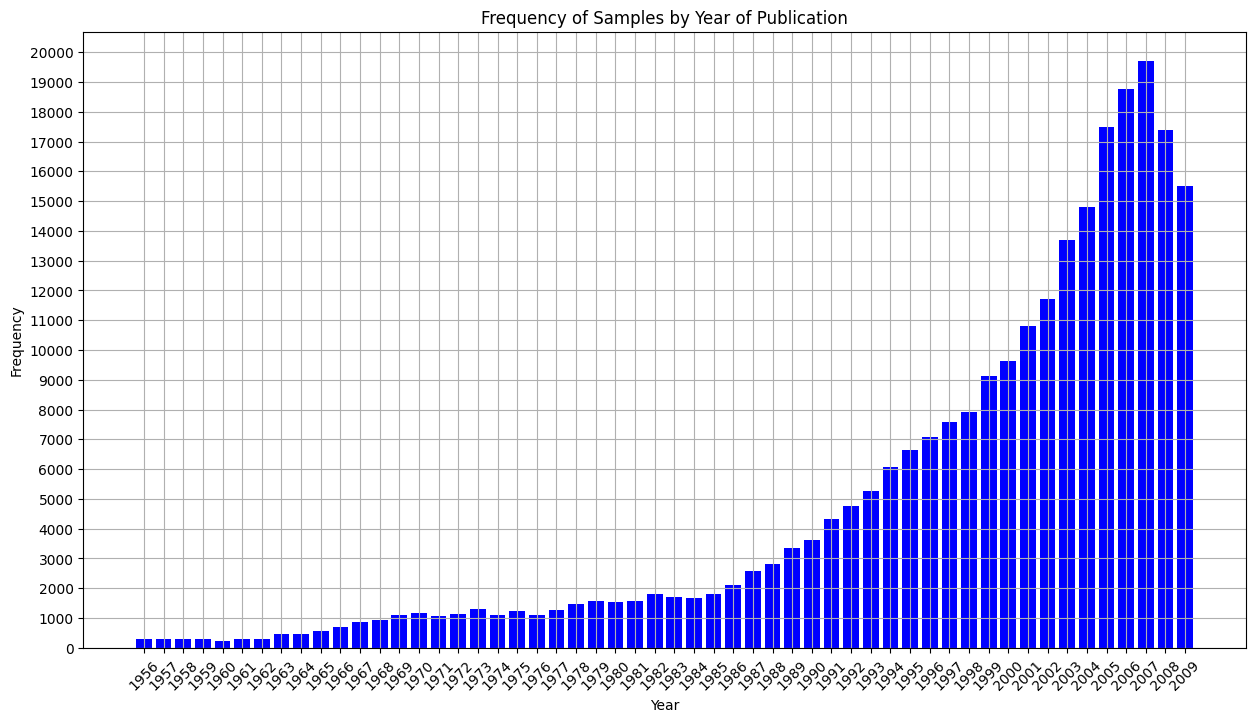

In [36]:
# Frequenza dei samples raggruppata in struttura dati a dizionario:  anno di pubblicazione:  frequenza dei samples,
frequency_year = {
    1956: 283, 1957: 299, 1958: 291, 1959: 296, 1960: 212, 1961: 285, 1962: 302,
    1963: 451, 1964: 473, 1965: 560, 1966: 689, 1967: 859, 1968: 934, 1969: 1105,
    1970: 1174, 1971: 1065, 1972: 1144, 1973: 1298, 1974: 1092, 1975: 1241, 1976: 1089,
    1977: 1251, 1978: 1463, 1979: 1554, 1980: 1551, 1981: 1581, 1982: 1798, 1983: 1693,
    1984: 1684, 1985: 1789, 1986: 2110, 1987: 2561, 1988: 2805, 1989: 3335, 1990: 3628,
    1991: 4323, 1992: 4771, 1993: 5263, 1994: 6061, 1995: 6629, 1996: 7065, 1997: 7591,
    1998: 7907, 1999: 9119, 2000: 9642, 2001: 10795, 2002: 11726, 2003: 13691, 2004: 14803,
    2005: 17476, 2006: 18767, 2007: 19702, 2008: 17380, 2009: 15519
}

# Converti i dati in un DataFrame
df_frequency = pd.DataFrame(list(frequency_year.items()), columns=['Year', 'Frequency'])

# Plotta i dati
plt.figure(figsize=(15, 8))
plt.bar(df_frequency['Year'], df_frequency['Frequency'], color='blue')
plt.xticks(df_frequency['Year'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Samples by Year of Publication')
plt.xticks(rotation=45)
plt.yticks(range(0, max(df_frequency['Frequency']) + 1000, 1000))
plt.grid(True)
plt.show()


#### Data by target column 'Year'

Sono presenti valori all'interno della colonna target 'Year' che vanno dal 1956 al 2009.

C'è uno sbilanciamento del dataset, che presenta molte più righe (e per cui canzoni e features su cui verranno allenati i modelli) per gli anni dal (circa) 1990 in poi.

Infatti, nel dataset per il 1990 stesso ci sono 3628 righe, per il 2000 ce ne sono più di 9mila e per il 2009 (anno maggiore == più vicino nel tempo all'anno odierno) ce ne sono più di 15mila.
In generale per gli anni 2000 ci sono circa più di 10mila righe, per gli altri, allontanandosi sempre più indietro nel tempo, ce ne sono sempre meno fino a toccare un minimo di circa 200 / 300.



##### Density Plot per tutte le colonne del dataset (esclusa la target column)

In [47]:



def plot_density_plots(dataframe,num_cols):
    """
    Plotta i density plot per ogni variabile numerica presente nel dataset e mostra il valore medio, la mediana e la moda.
    """
    # Seleziona le colonne del dataset
    numeric_columns = dataframe.columns

    num_plots = len(numeric_columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calcola il numero di righe necessario

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

    # Appiattisci gli assi per facilitare l'iterazione, in caso ci siano pochi plots
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        sns.kdeplot(dataframe[col], ax=axes[i], fill=True)
        # Calcolo della media,moda  mediana per ogni colonna
        mean_val = dataframe[col].mean()
        mode_val = dataframe[col].mode().values[0]
        median_val = dataframe[col].median()

        # Aggiunta linee verticali in prossimità della media, moda e mediana
        axes[i].axvline(dataframe[col].mean(), color='r', linestyle='--',label='Mean')
        axes[i].axvline(mode_val, color='g', linestyle='--',label='Mode')
        axes[i].axvline(median_val, color='b', linestyle='--',label='Median')

        axes[i].text(mean_val,axes[i].get_ylim()[1] * 0.9, f'Mean:{mean_val:.2f}', color='r', ha='center') # Aggiunge il valore della media come testo per ogni grafico nel 90% dell'altezza delle y
        axes[i].set_title(f'Density Plot: {col}')
        axes[i].legend() #mostra legenda per media,mediana e moda

    # Nascondi gli assi inutilizzati
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



#Uso della funzione
plot_density_plots(data.iloc[:,1:],1)



Dal density plot notiamo come non sia presente una distribuzione gaussiana per tutte le features contenute nel dataset. Ad esempio alcune delle colonne sbilanciate sono:
 <br>S0,S4,S5,S12,S13,S14,S15,S16,S17,S18,S21

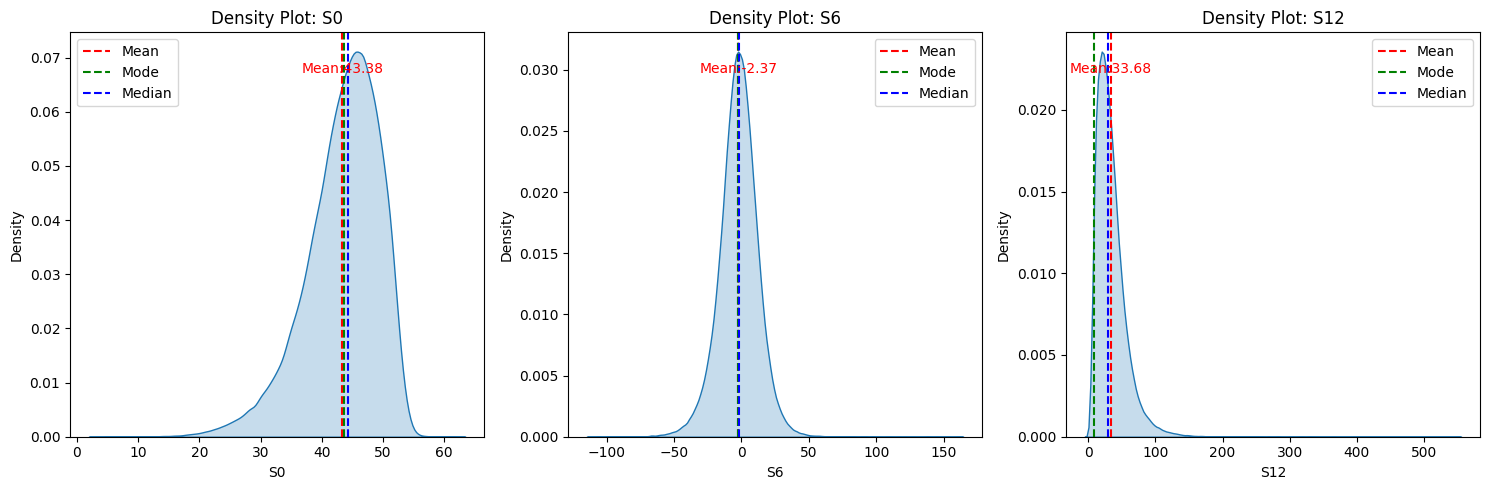

In [49]:
plot_density_plots(data.iloc[:,[1,7,13]],3) #Stampo le colonne S0,S12,S18,S21
#S0 sbilanciata negativamente
#S12,S18,S21 sbilanciata positivamente

##### Box plot

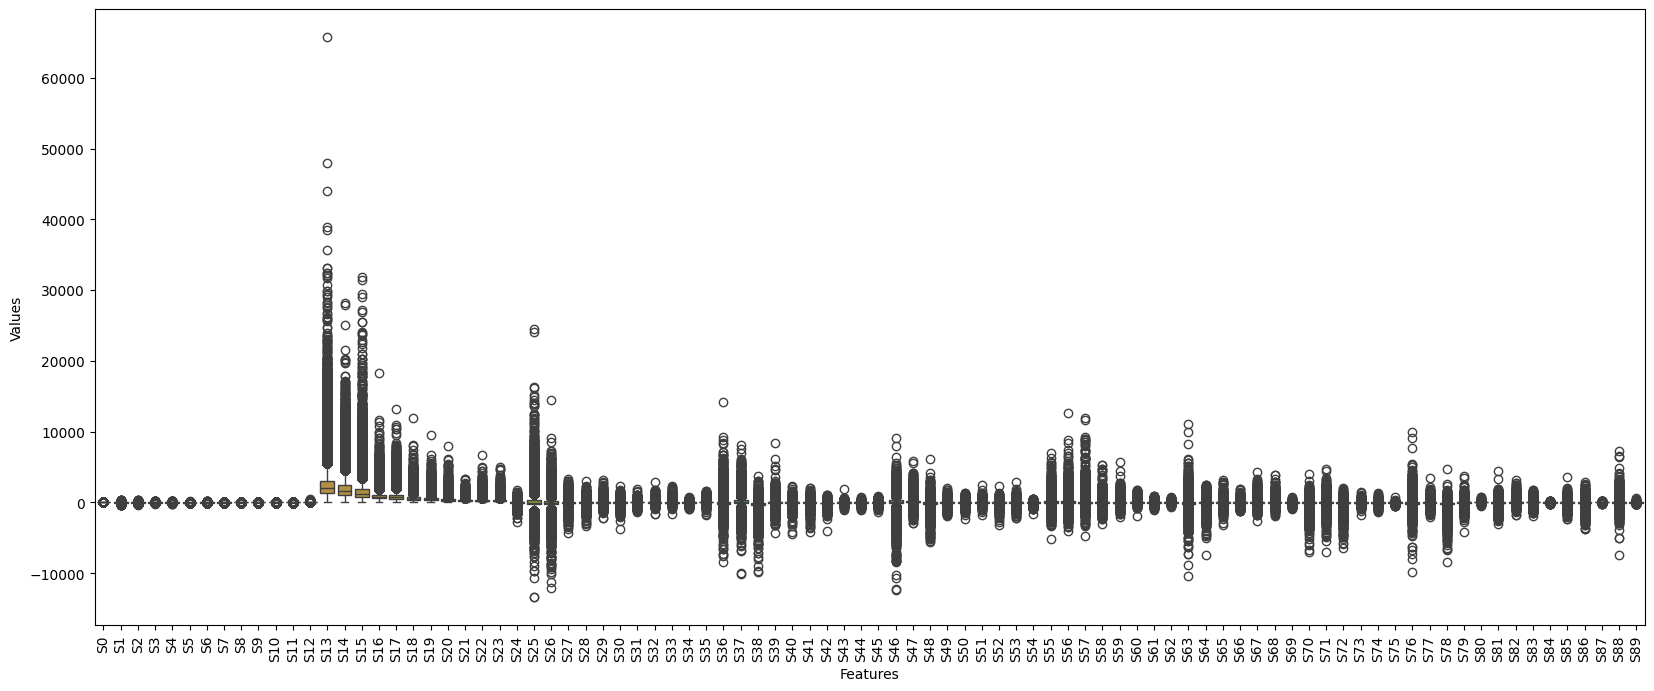

In [69]:
# Plot del boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(data=no_target_column_data, orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

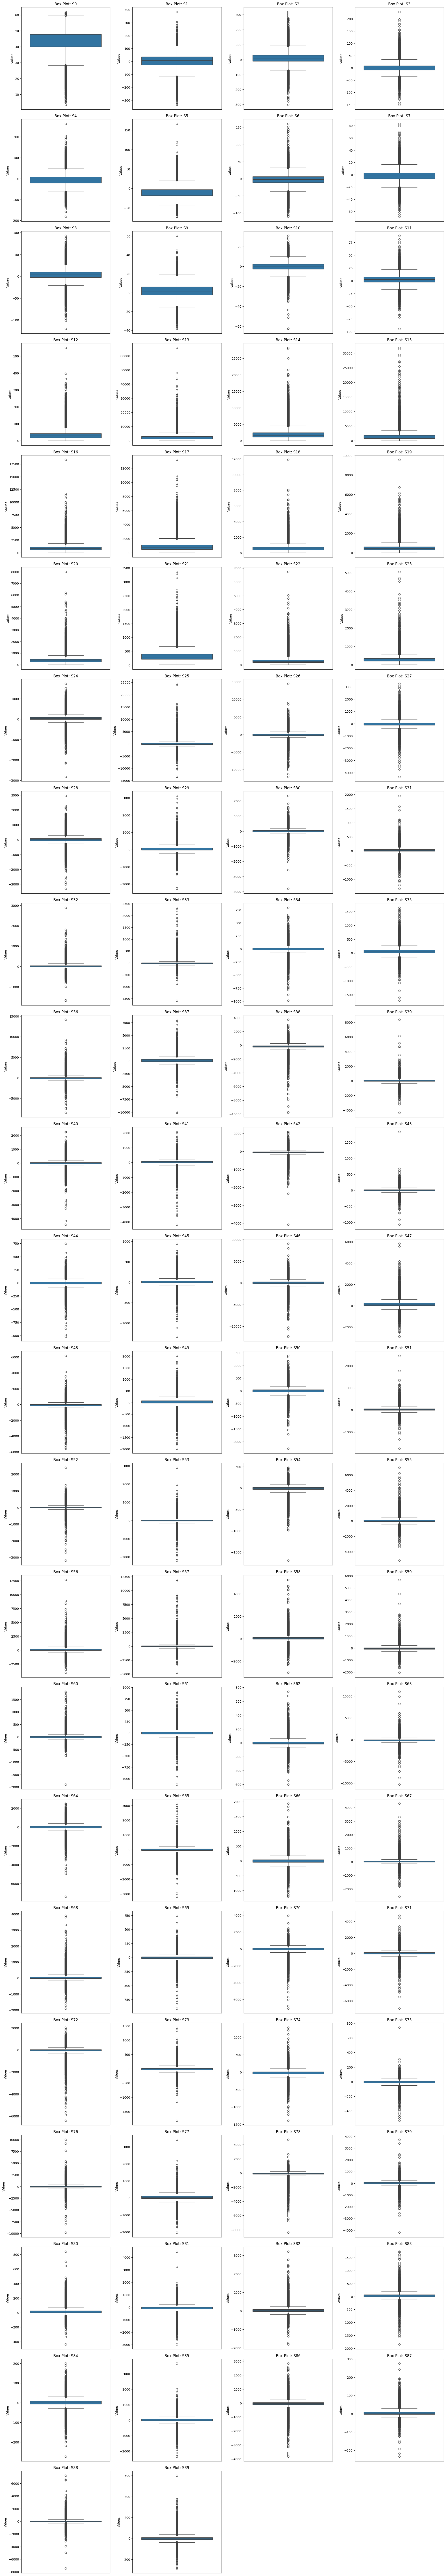

In [78]:
#Box plot per ciascuna colonna
num_cols = 4  # Numero di colonne per riga
num_rows = (no_target_column_data.iloc[:,:].shape[1] + num_cols - 1) // num_cols  # Calcola il numero di righe necessario

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Appiattisci gli assi per facilitare l'iterazione

for i, col in enumerate(no_target_column_data.iloc[:,:].columns):
    sns.boxplot(data=no_target_column_data, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_xlabel('')  # Rimuovi l'etichetta dell'asse x
    axes[i].set_ylabel('Values')
    axes[i].set_xticks([])  # Rimuovi i tick dell'asse x

# Nascondi gli assi inutilizzati
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [93]:
# Funzione per contare gli outliers e calcolare la percentuale di outliers
def count_outliers(df):
    outliers_count = {}
    outliers_percentage = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
        total_samples = df[col].shape[0]
        outliers_percentage[col] = (outliers_count[col] / total_samples) * 100 #num totale di samples 252175 
    return outliers_count, outliers_percentage


# Calcolo degli outliers e delle percentuali di outliers per ciascuna colonna
outliers_count, outliers_percentage = count_outliers(no_target_column_data)

# Conteggio il numero totale degli outliers nell'intero dataset
total_outliers_on_dataset = sum(outliers_count.values())

# Calcolo del numero totale di campioni per ciascuna colonna
rows_columns = no_target_column_data.shape[0] * len(no_target_column_data.columns)

# Calcolo della percentuale totale degli outliers nel dataset
total_outliers_percentage = (total_outliers_on_dataset / rows_columns) * 100

# Stampa del conteggio degli outliers e della percentuale di outliers per ciascuna colonna
for col in no_target_column_data.columns:
    print(f'{col}: {outliers_count[col]} outliers | {outliers_percentage[col]:.2f}% outliers')

# Stampa del numero totale degli outliers nel dataset
print("Total numbers of outliers in the dataset: ", total_outliers_on_dataset)
print("Total  rows_columns:",rows_columns)

# Stampa della percentuale totale degli outliers nel dataset
print(f'Total percentage of outliers in dataset: {total_outliers_percentage:.2f}%')


S0: 5306 outliers | 2.10% outliers
S1: 7313 outliers | 2.90% outliers
S2: 7484 outliers | 2.97% outliers
S3: 11229 outliers | 4.45% outliers
S4: 5224 outliers | 2.07% outliers
S5: 5902 outliers | 2.34% outliers
S6: 6739 outliers | 2.67% outliers
S7: 7096 outliers | 2.81% outliers
S8: 7418 outliers | 2.94% outliers
S9: 3011 outliers | 1.19% outliers
S10: 7666 outliers | 3.04% outliers
S11: 6552 outliers | 2.60% outliers
S12: 9167 outliers | 3.64% outliers
S13: 12770 outliers | 5.06% outliers
S14: 9973 outliers | 3.95% outliers
S15: 12067 outliers | 4.79% outliers
S16: 9861 outliers | 3.91% outliers
S17: 10543 outliers | 4.18% outliers
S18: 8658 outliers | 3.43% outliers
S19: 12464 outliers | 4.94% outliers
S20: 10325 outliers | 4.09% outliers
S21: 9458 outliers | 3.75% outliers
S22: 11676 outliers | 4.63% outliers
S23: 9960 outliers | 3.95% outliers
S24: 20637 outliers | 8.18% outliers
S25: 19611 outliers | 7.78% outliers
S26: 22284 outliers | 8.84% outliers
S27: 19001 outliers | 7.53% 

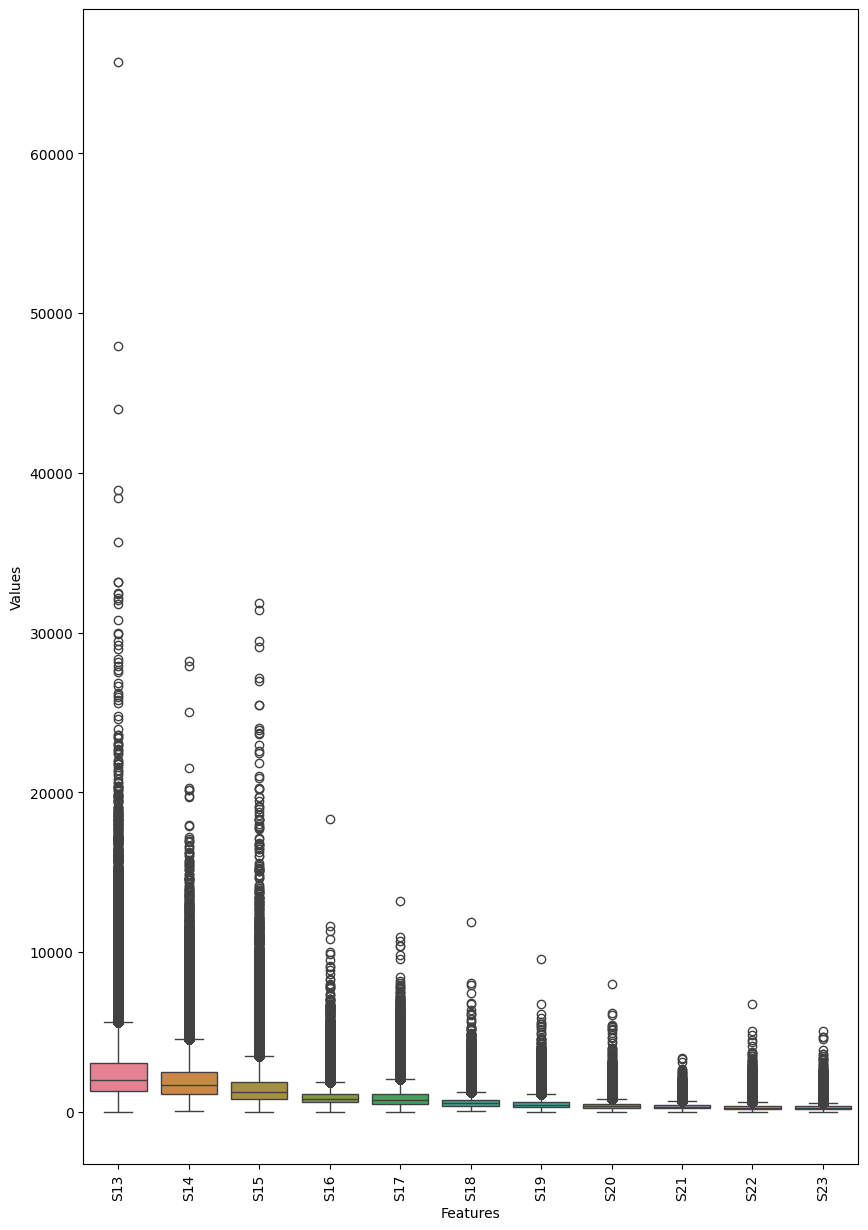

In [12]:
# Box plot S13 to S23
plt.figure(figsize=(10, 15))
sns.boxplot(data=no_target_column_data.iloc[:,13:24], orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

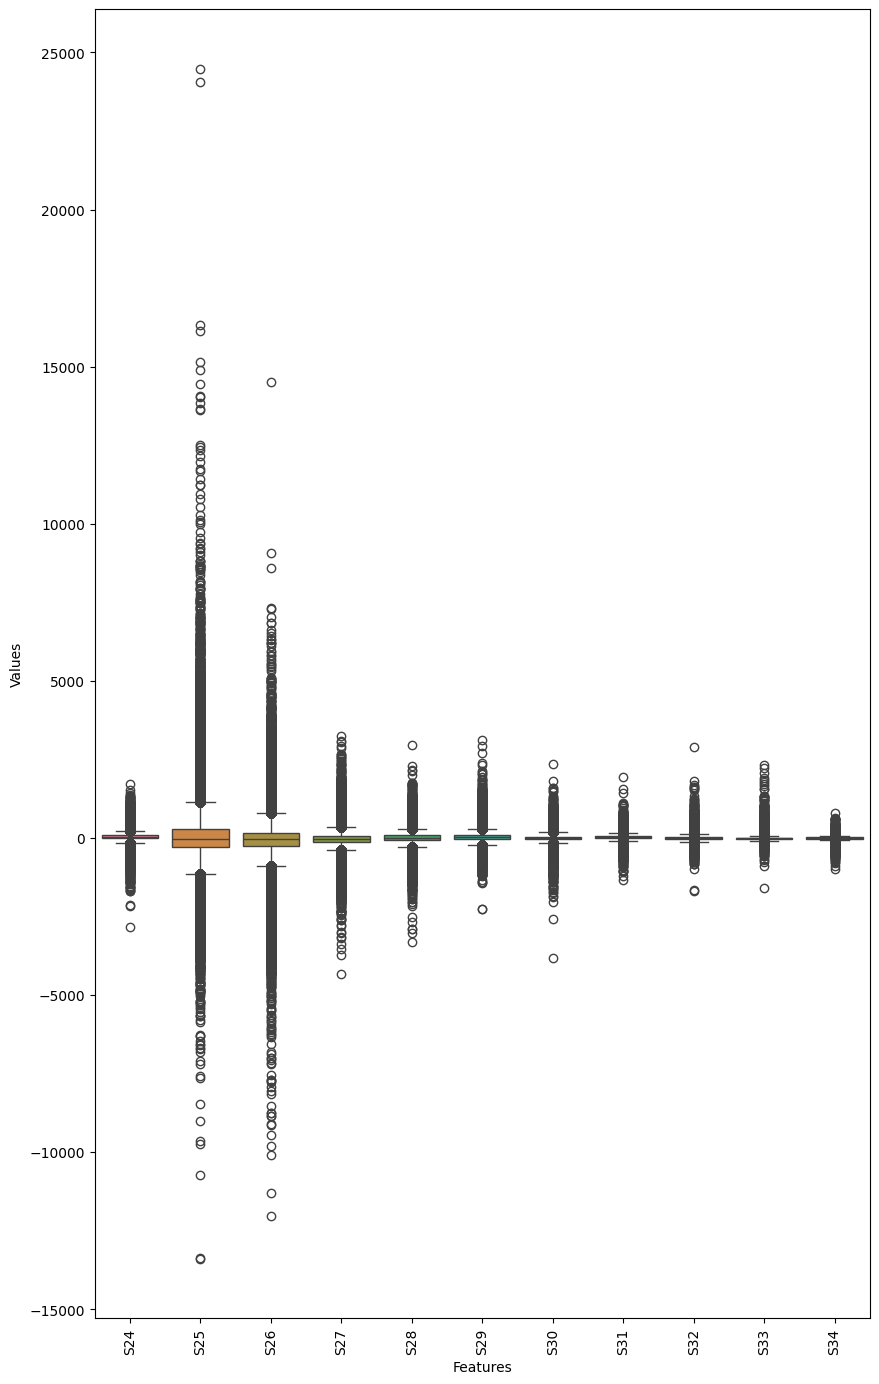

In [13]:
# Box plot S24 to S34
plt.figure(figsize=(10, 17))
sns.boxplot(data=no_target_column_data.iloc[:,24:35], orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

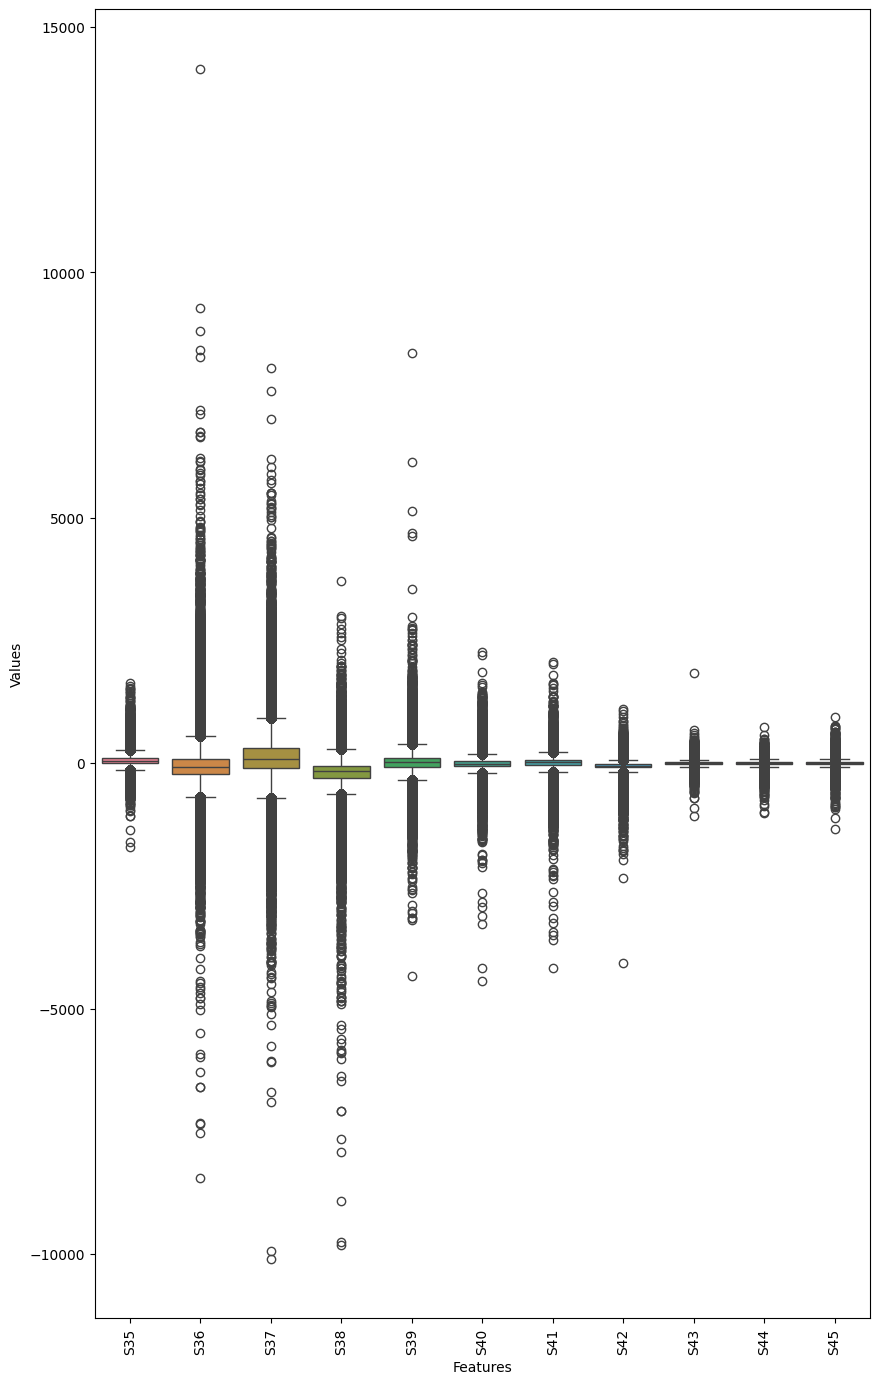

In [14]:
# Box plot S35 to S45
plt.figure(figsize=(10, 17))
sns.boxplot(data=no_target_column_data.iloc[:,35:46], orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

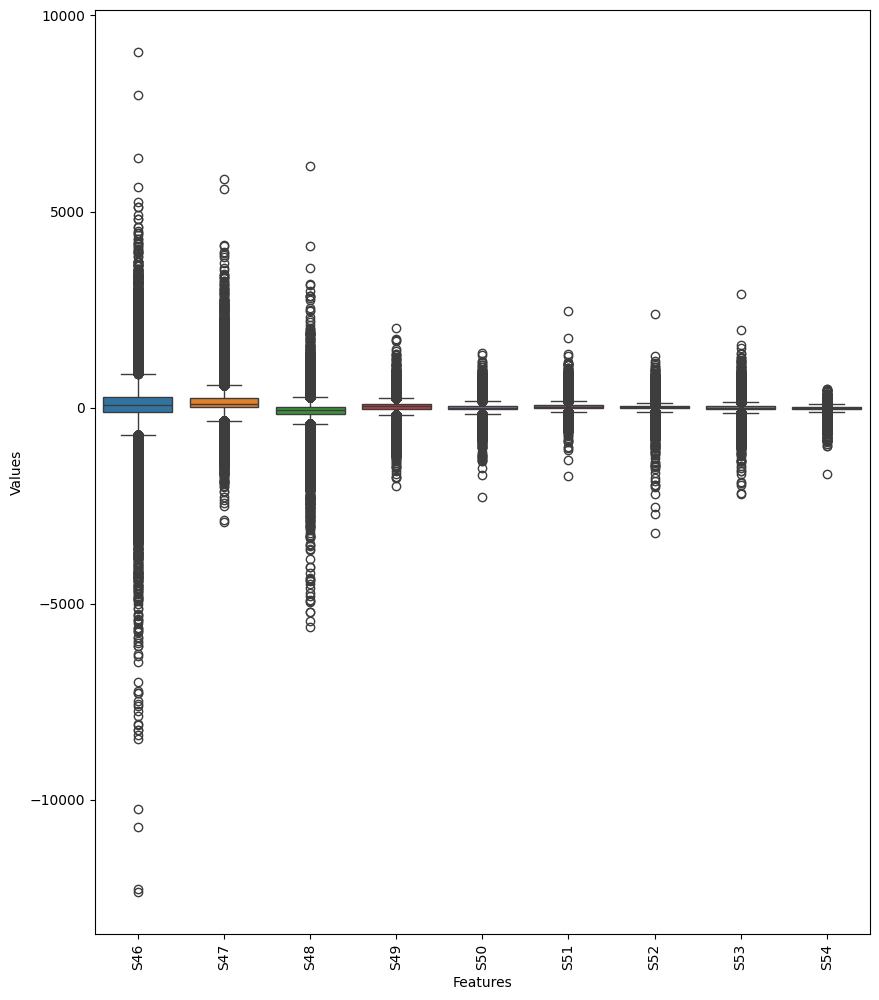

In [15]:
# Box plot S46 to S54
plt.figure(figsize=(10, 12))
sns.boxplot(data=no_target_column_data.iloc[:,46:55], orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

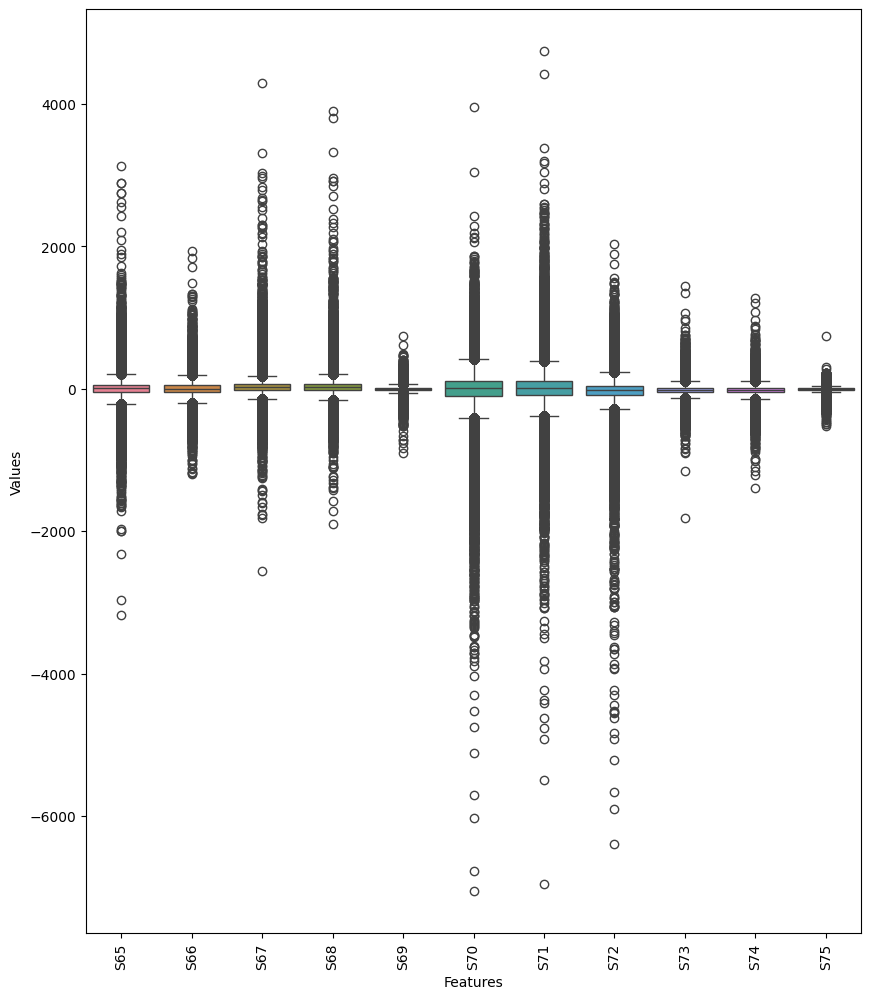

In [17]:
# Box plot S65 to S75
plt.figure(figsize=(10, 12))
sns.boxplot(data=no_target_column_data.iloc[:,65:76], orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

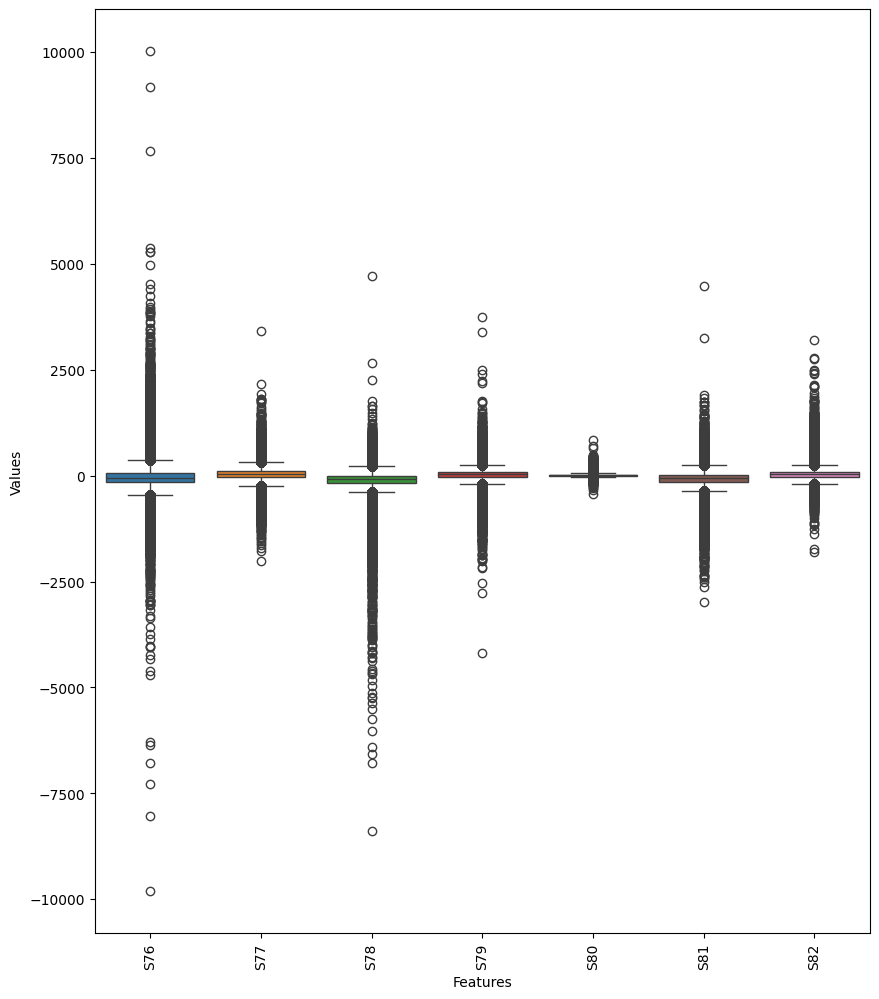

In [18]:
# Box plot S76 to S82
plt.figure(figsize=(10, 12))
sns.boxplot(data=no_target_column_data.iloc[:,76:83], orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

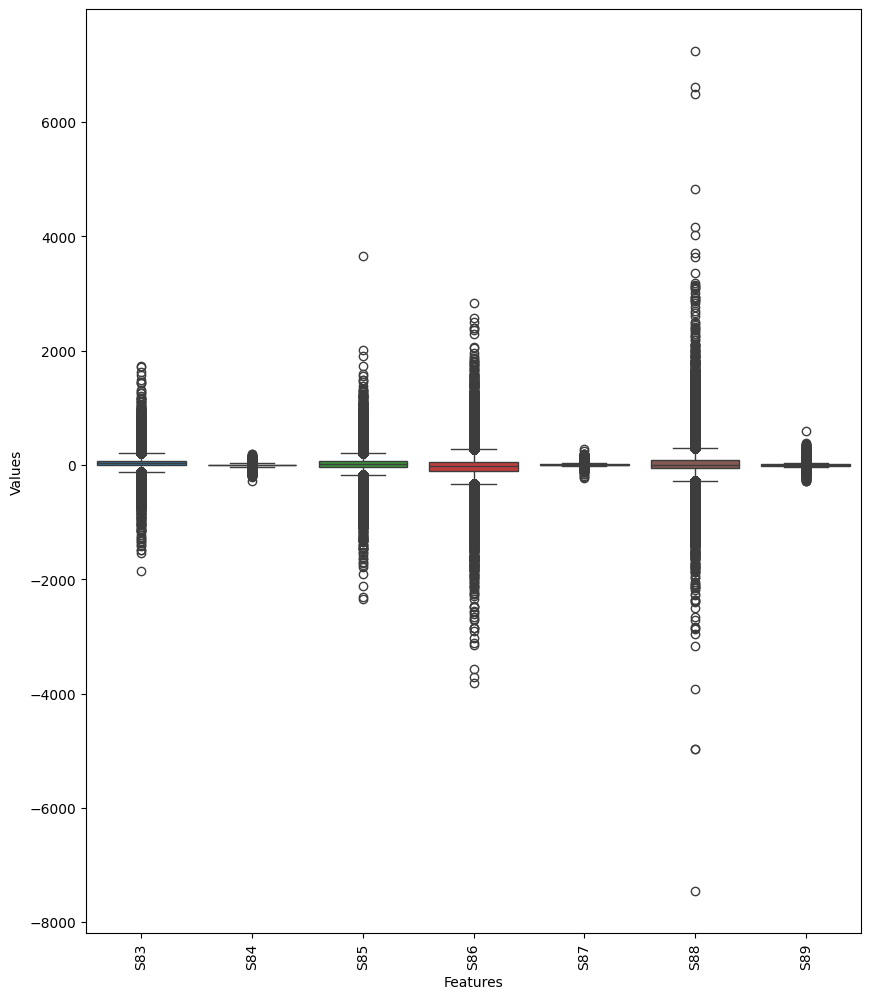

In [19]:
# Box plot S83 to S89
plt.figure(figsize=(10, 12))
sns.boxplot(data=no_target_column_data.iloc[:,83:90], orient='v')  # orient='v' indica un boxplot verticale

# Aggiunta di etichette all'asse x
plt.xticks(rotation=90)  # Puoi regolare l'angolo di inclinazione delle etichette per una migliore leggibilità

# Titoli e etichette degli assi
plt.xlabel('Features')
plt.ylabel('Values')

# Visualizzazione del boxplot
plt.show()

#### Preprocessing: suddivisione del dataset

In [5]:
X=no_target_column_data.copy() #90 COLONNE
y=target_label.copy()

#### Splitting Dataset: Train & Validation

In [6]:
# X sono le feature (variabili indipendenti), y è la colonna target
# 80% training set - 20% validation set
seed=89
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed,stratify=y)

In [21]:
import numpy as np

def find_nan_positions(data):
    nan_positions = np.argwhere(pd.isna(data).to_numpy())
    return nan_positions

nan_positions = find_nan_positions(X_train)

if nan_positions.size > 0:
    print("Valori NaN trovati alle seguenti posizioni:")
    for position in nan_positions:
        print(f"Riga: {position[0] + 1}, Colonna: {position[1] + 1}")
else:
    print("Il DataFrame non contiene valori NaN.")


Il DataFrame non contiene valori NaN.


---
#### Data Preprocessing


In [24]:
X = X_train.copy()
y = y_val.copy()

##### Min max scaling

In [25]:
X_Validation = X_val.copy()

# Min-Max Scaling
# Creazione dell'oggetto MinMaxScaler e adattamento solo al training set
#file = open("scaler.save","wb") #salvataggio dello scaler sul disco nel file "scaler.save"
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#apply transform on validation set
X_val_scaled = scaler.transform(X_Validation)
#pickle.dump(scaler, file)
#file.close()

# save the model
with open("../pickle_saves/preprocess/minMaxScaler.save", "wb") as file:
    pickle.dump(scaler, file)

#name columns after min-max scaling
# num_colonne = X_scaled.shape[1]  # Ottieni il numero di colonne
# nome_colonne = ['S' + str(i) for i in range(num_colonne)]
# X_scaled_df = pd.DataFrame(X_scaled, columns=nome_colonne)

# print("Dati di training originali:")
# print(X)
print("\nDati di training normalizzati MinMaxScaling:")
print(X_scaled)
# print("\nDati di validation originali:")
# print(X_Validation)
# print("\nDati di validation normalizzati Min-Max:")
# print(X_val_scaled)



Dati di training normalizzati MinMaxScaling:
[[0.52549228 0.42736383 0.39103463 ... 0.50563882 0.50178641 0.33218795]
 [0.66124869 0.50385367 0.44121494 ... 0.48279718 0.50627651 0.3193556 ]
 [0.75704318 0.48988436 0.47652797 ... 0.45565519 0.50188007 0.30821126]
 ...
 [0.81026452 0.47977891 0.52228356 ... 0.45482219 0.50625178 0.30232891]
 [0.54172766 0.54405139 0.27972061 ... 0.50070901 0.51659213 0.29712004]
 [0.75397911 0.57359645 0.4808505  ... 0.46099608 0.51376673 0.32752997]]


##### PCA

##### Studio n_components

In [30]:
num_columns = X_scaled.shape[1]
nums = np.arange(num_columns)

In [31]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 0.85, '95% cut-off threshold')

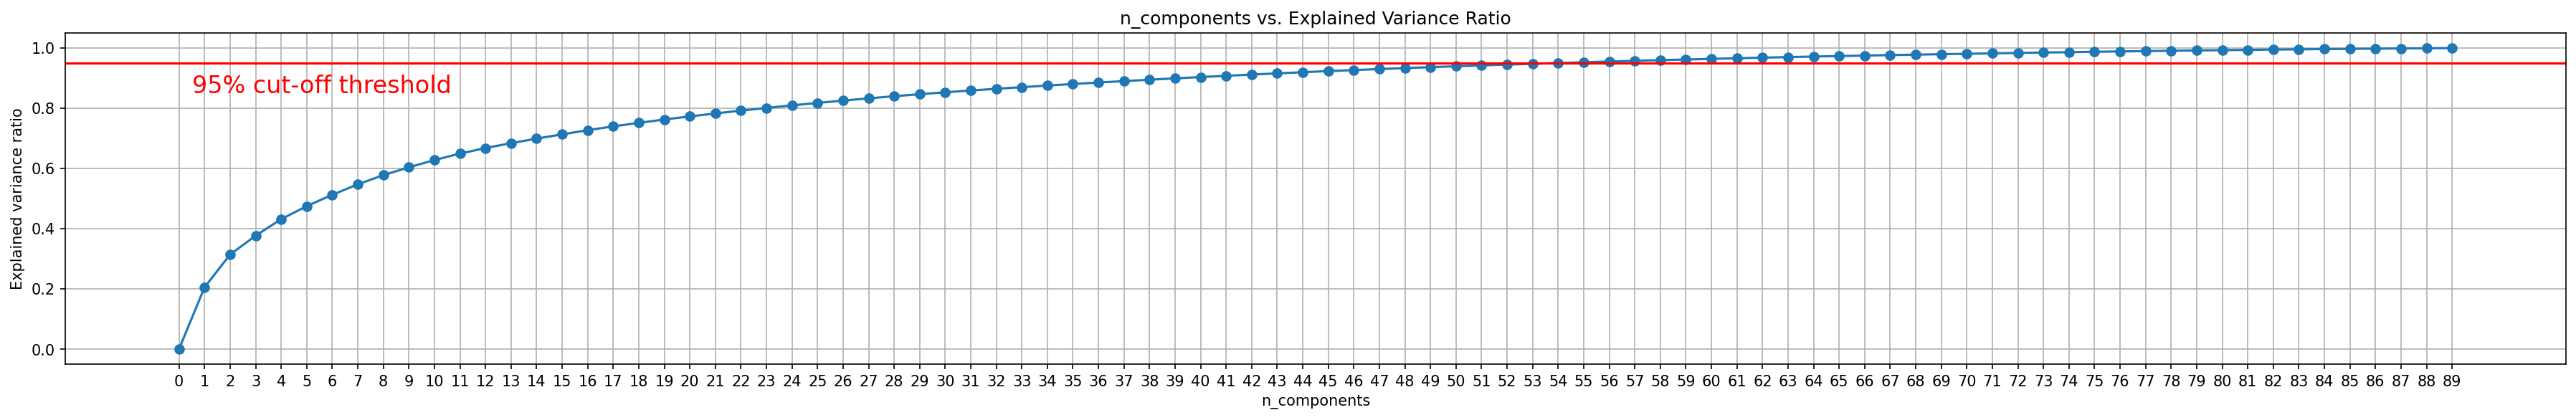

In [32]:
#Dalla Figura si nota come la linea di cutoff del 95% interseca il valore della X nella colonna 51/52
plt.figure(figsize=(30,4),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.xticks(np.arange(0,90,1))
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
#linea di cutoff del 95%
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

##### PCA Analysis

In [33]:
# Inizializzare l'oggetto PCA
pca = PCA(n_components=52) #52
X_decomposed = pca.fit_transform(X_scaled)
#pca.get_feature_names_out(X_scaled_df.columns)

# Ottieni i vettori delle componenti principali
components = pca.components_


#validation data after PCA
X_val_decomposed = pca.transform(X_val_scaled)

with open("../pickle_saves/preprocess/pca.save", "wb") as file:
    pickle.dump(pca, file)


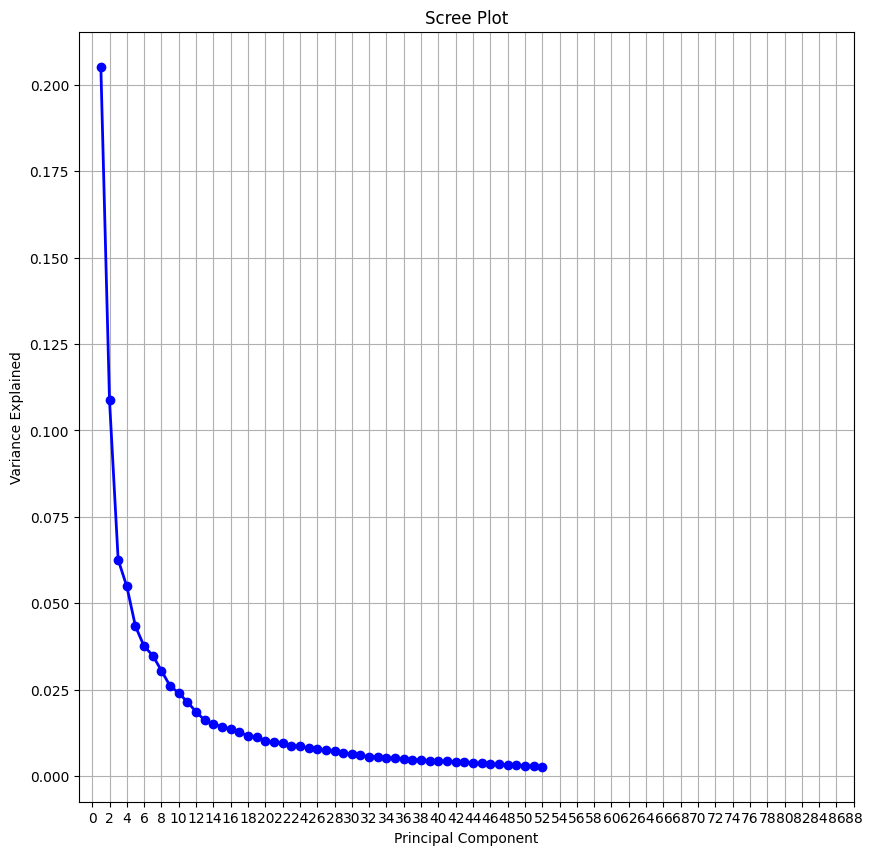

Explainer variance of each component: [0.20527004 0.10872813 0.06257798 0.0548593  0.04330118 0.03754304
 0.03486264 0.03047608 0.02605758 0.02400461 0.02141404 0.01859057
 0.01611696 0.01511599 0.01418354 0.01367813 0.01278297 0.01154088
 0.01130126 0.01023893 0.0097401  0.00962552 0.00878675 0.00856073
 0.00805735 0.00771518 0.00747311 0.00709991 0.00668843 0.00636074
 0.0059385  0.00559941 0.00549393 0.0052898  0.00512977 0.00495188
 0.00468138 0.00465606 0.00447449 0.00431139 0.00419749 0.0040887
 0.00404072 0.00378719 0.00365698 0.00347648 0.00334306 0.00327852
 0.00309661 0.0029588  0.00284408 0.00267365]
Variance total: 0.9447205534727602


In [34]:
#Scree Plot -> mostra la percentuale di variazione spiegata da ogni componente principale
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(range(0,90,2))
plt.ylabel('Variance Explained')
plt.show()
print("Explainer variance of each component:",pca.explained_variance_ratio_)
print("Variance total:", sum(pca.explained_variance_ratio_))

In [ ]:
num_columns=X_decomposed.shape[1]

---
### Models

#### Linear Regression

In [62]:
##MinMaxScaling(), MSE: 84.500
##MinMaxScaling(),PCA, MSE:86.114

regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_scaled, y_train)


# save the model
with open("../pickle_saves/models/LR.save", "wb") as file:
    pickle.dump(regr, file)

# Make predictions using the testing set
y_predictions = regr.predict(X_val_scaled)
#MSE
mse = mean_squared_error(y_val, y_predictions)
#MAE
mae = mean_absolute_error(y_val, y_predictions)
#MAPE
mape = mean_absolute_percentage_error(y_val, y_predictions)
#R2
r2 = r2_score(y_val, y_predictions)

# # save the model
# with open("../pickle_saves/models/regr.save", "wb") as file:
#     pickle.dump(regr, file)

print("Mean squared error: %.3f" % mse)
print("MAE: %.3f" % mae)
print("MAPE: %.3f" % mape)
print("R2: %.3f" % r2)

Mean squared error: 84.343
MAE: 6.603
MAPE: 0.003
R2: 0.235


#### Random Forest Regressor con GridSearch

In [11]:
#------------------------------------------------------------Prove precedenti
#-------------MINMAXSCALING (CON PCA=52)------------------
#----------BEST PARAMS----------
#{'max_depth': 4, 'n_estimators': 300, 'random_state': 89}
#Mean squared error: 93.907


#-----------Solo MinMaxScaling------------------
# Mean squared error: 93.910
# ----------BEST PARAMS----------
# {'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
# --------------------------------
# Mean squared error: 84.530
# ----------BEST PARAMS----------
# {'max_depth': 200, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300}
# --------------------------------
# Mean squared error: 84.378

 #Params Migliore: {'max_depth': 100, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 500} -> MSE: 82.353
#------------------------------------------------------------

# Definire la grid e la metrica di valutazione
grid1 = {
    'max_depth': [100,200,300],
    'max_features': [2,3,5],
    'min_samples_leaf': [2,3,5],
    'min_samples_split': [2,3,5],
    'n_estimators': [100,300,500]
}

#Funzione per stampare ad ogni iterazione i parametri usati e MSE
def print_results(results):
    print("Grid scores:")
    for i in range(len(results['params'])):
        print(f"Params: {results['params'][i]} -> MSE: {-results['mean_test_score'][i]:.3f}")

# Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv=5, 
                      scoring="neg_mean_squared_error",n_jobs=-1,verbose=2)


# Modificare la forma del target y
y_train_reshaped = np.ravel(y_train)

CV_rfr.fit(X_scaled, y_train_reshaped)

# Stampa i risultati della grid search
print_results(CV_rfr.cv_results_)


# Print results
print("----------BEST PARAMS----------")
print(CV_rfr.best_params_)
print("--------------------------------")






Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Grid scores:
Params: {'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} -> MSE: 87.512
Params: {'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300} -> MSE: 86.858
Params: {'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500} -> MSE: 86.880
Params: {'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100} -> MSE: 87.323
Params: {'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300} -> MSE: 86.919
Params: {'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 500} -> MSE: 86.767
Params: {'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} -> MSE: 87.460
Params: {'max_depth'

#### Random Forest Best Model (Allenato nuovamente per calcolare le metriche di MSE,MAE,MAPE ed R2)

In [9]:
rfr=RandomForestRegressor(max_depth=100,max_features=5, min_samples_leaf= 2, min_samples_split= 3, n_estimators= 500) 
# Modificare la forma del target y
y_train_reshaped = np.ravel(y_train)

rfr.fit(X_scaled, y_train_reshaped)

#Salvataggio Modello RFR
with open("../pickle_saves/models/RFR.save", "wb") as file:
    pickle.dump(rfr, file)

y_predictions = rfr.predict(X_val_scaled)

#MSE
mse = mean_squared_error(y_val, y_predictions)
#MAE
mae = mean_absolute_error(y_val, y_predictions)
#MAPE
mape = mean_absolute_percentage_error(y_val, y_predictions)
#R2
r2 = r2_score(y_val, y_predictions)

print("Mean squared error: %.3f" % mse)
print("MAE: %.3f" % mae)
print("MAPE: %.3f" % mape)
print("R2: %.3f" % r2)

Mean squared error: 82.184
MAE: 6.684
MAPE: 0.003
R2: 0.254


### KNR 

#### Trovo un certo range di K su cui effettuare la Cross-Validation successivamente
calcolando la metrica MSE sul validation set per avere una metrica di riferimento dell'errore e scegliere successivamente per la GridSearch:
 <ul>
<li> K=10 (78.8 MSE) </li>
<li>K=15 (77.4 MSE) </li>
<li>K=20 (77.07)</li>
<li>K=28 (76.8) </li>
 <li>K=30 (76.7)</li>
 </ul>

In [ ]:
y_train_new = np.ravel(y_train)
scores = []
for i in range(1,89):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scaled,y_train_new)
    y_pred = knn.predict(X_val_scaled)

        # Calcola le metriche di valutazione
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    #MAPE
    mape = mean_absolute_percentage_error(y_val, y_pred)
    print("PARAMETRO K:", i)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("MAE:", mae)
    print("MAPE: %.3f" % mape)

PARAMETRO K: 1
MSE: 131.76950530385645
RMSE: 11.479089916184838
R2 Score: -0.19556458534204912
MAE: 7.410905125408942
MAPE: 0.004
PARAMETRO K: 2
MSE: 100.76346287300485
RMSE: 10.038100561012769
R2 Score: 0.08575791166860158
MAE: 6.902240507584019
MAPE: 0.003
PARAMETRO K: 3
MSE: 91.02353744643821
RMSE: 9.540625631814624
R2 Score: 0.17412972331821874
MAE: 6.701715078814314
MAPE: 0.003
PARAMETRO K: 4
MSE: 86.52159586596609
RMSE: 9.301698547360374
R2 Score: 0.2149765179273334
MAE: 6.588247248934272
MAPE: 0.003
PARAMETRO K: 5
MSE: 83.57679627242983
RMSE: 9.14203458057504
R2 Score: 0.2416951285561203
MAE: 6.508254188559533
MAPE: 0.003
PARAMETRO K: 6
MSE: 81.93536014452046
RMSE: 9.051815295537159
R2 Score: 0.25658812598450176
MAE: 6.454677637883745
MAPE: 0.003
PARAMETRO K: 7
MSE: 80.74310154715202
RMSE: 8.98571652942335
R2 Score: 0.2674056679665886
MAE: 6.42414989590562
MAPE: 0.003
PARAMETRO K: 8
MSE: 79.87128637107168
RMSE: 8.937073702900278
R2 Score: 0.2753157784817786
MAE: 6.39954644592049

In [ ]:
# Definisci i parametri da testare
# param_grid = {'n_neighbors': [3, 5, 7, 9, 11]} vecchia iterazione
param_grid = {'n_neighbors': [10,15,20,28,30], 
              "weights": ["uniform","distance"],
              'metric':["manhattan","euclidean","l1","l2","minkowski"]}

# Crea un'istanza del modello KNN per la regressione
knn_regressor = KNeighborsRegressor()
y_train_new = np.ravel(y_train)

# Crea un'istanza di GridSearchCV per trovare il miglior parametro
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)

# Esegui la ricerca dei parametri utilizzando il set di addestramento
grid_search.fit(X_scaled, y_train_new)

# Ottieni i risultati della grid search
results = grid_search.cv_results_

# Stampa i parametri usati e la relativa MSE per ogni iterazione
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Parametri: {params} - MSE: {-mean_score}")

# Ottieni il miglior parametro trovato
best_k = grid_search.best_params_['n_neighbors']
best_weight = grid_search.best_params_['weights']

print("------------------------- BEST MODEL PARAMS -------------------------")
print("N_neighbour: ",best_k,"  best weight: ",best_weight)

# Utilizza il modello addestrato con il miglior parametro per fare previsioni su nuovi dati
best_knn_regressor = grid_search.best_estimator_
y_predictions = best_knn_regressor.predict(X_val_scaled)



# Calcola le metriche di valutazione
mse = mean_squared_error(y_val, y_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_predictions)
mae = mean_absolute_error(y_val, y_predictions)
#MAPE
mape = mean_absolute_percentage_error(y_val, y_predictions)

print("Miglior parametri:",grid_search.best_params_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE: %.3f" % mape)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Parametri: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'} - MSE: 79.98894547437295
Parametri: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'} - MSE: 78.76278474491221
Parametri: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'} - MSE: 78.66581223356795
Parametri: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - MSE: 77.60248714740983
Parametri: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'} - MSE: 78.25391469217804
Parametri: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'} - MSE: 77.3096520722956
Parametri: {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'uniform'} - MSE: 78.06030377552032
Parametri: {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'} - MSE: 77.26028776606162
Parametri: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'} - MSE: 78.04892596080764
Parametri: {'metric': 'man

Notiamo come in realtà il valore dell'MSE più basso,  ottenuto durante la fase di Cross-Validation, riguarda due configurazioni: <br>
{'metric': 'l2', 'n_neighbors': 28, 'weights': 'distance'} - MSE: 76.76 <br>
{'metric': 'euclidean', 'n_neighbors': 28, 'weights': 'distance'} - MSE: 76.76 <br>

Data questa uguaglianza abbiamo preferito usare la seconda configurazione che utilizzava come metrica per la distanza quella euclidea

#### KNR Best Model

In [ ]:
# Crea un'istanza del modello KNN per la regressione
knn_regressor = KNeighborsRegressor(n_neighbors=28,weights='distance',metric='euclidean')
y_train_new = np.ravel(y_train)

#train del modello knnr
knn_regressor.fit(X_scaled,y_train_new)

# save the model KNN
with open("../pickle_saves/models/KNR.save", "wb") as file:
    pickle.dump(knn_regressor, file)

#predizioni 
y_predictions = knn_regressor.predict(X_val_scaled)

# Calcola le metriche di valutazione
mse = mean_squared_error(y_val, y_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_predictions)
mae = mean_absolute_error(y_val, y_predictions)
#MAPE
mape = mean_absolute_percentage_error(y_val, y_predictions)

#print("Miglior parametro K:", best_k, "weights:",best_weight)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE: %.3f" % mape)

#MSE: 76.19345818438899
#MAE: 6.33
#MAPE: 0.003
#R2: 0.30

MSE: 76.19345818438899
RMSE: 8.7288864229287
R2 Score: 0.30223533891966126
MAE: 6.3399361043608975
MAPE: 0.003


#### SVM Regressor

In [ ]:
# Definizione della griglia di iperparametri e kernel
#Eseguire cosi provare
param_grid = {
    'C': [0.1,1],
    'epsilon': [0.1,0.5,0.8],
    'kernel': ['poly']
}


y_train_new = np.ravel(y_train)

# Creazione del modello SVR
svr_model = SVR()

# Ricerca Grid per il tuning degli iperparametri e dei kernel
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_search.fit(X_scaled, y_train_new)

# Valutazione del modello migliore
best_model = grid_search.best_estimator_
y_predictions = best_model.predict(X_val_scaled)

# Calcola MSE
mse = mean_squared_error(y_val, y_predictions)
# Calcola RMSE
rmse = np.sqrt(mse)
# Calcola R2 Score
r2 = r2_score(y_val, y_predictions)
# Calcola MAE
mae = mean_absolute_error(y_val, y_predictions)
# Calcola MAPE
mape = mean_absolute_percentage_error(y_val,y_predictions)

print("Best parameters:", grid_search.best_params_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)

#Settaggio: 'C': 0.1, 'epsilon': 0.01, 'kernel': 'poly'}
# MSE: 86.91330648460543
# RMSE: 9.322730634562248
# R2 Score: 0.21142246843562673
# MAE: 6.22451918257399
# MAPE: 0.003128732327132059
#----------------
#{'C': 0.5, 'epsilon': 0.1, 'kernel': 'poly'} 
#MSE: 84.39535038972714


#----- {'C': 1, 'epsilon': 0.5, 'kernel': 'poly'

#MSE: 83.466370627596
#RMSE: 9.135993138547994
#R2 Score: 0.24269703707791712
#MAE: 6.073974985117682
#MAPE: 0.0030530406859256344

#Best parameters: {'C': 1, 'epsilon': 0.8, 'kernel': 'poly'}

#MSE: 83.40573931226207
#RMSE: 9.132674269471242
#R2 Score: 0.2432471541418677
#MAE: 6.07423337170572
#MAPE: 0.0030531516336399058

#### Modello SVR migliore salvato

In [19]:
#reshape y_train
y_train_new = np.ravel(y_train)

# Creazione del modello SVR
svr_model = SVR(C=1, epsilon=0.8, kernel='poly')
svr_model.fit(X_scaled,y_train_new)

# save the model SVR
with open("../pickle_saves/models/SVR.save", "wb") as file:
    pickle.dump(svr_model, file)

##### Calcolo metriche SVR 

In [20]:
y_predictions=svr_model.predict(X_val_scaled)
# Calcola MSE
mse = mean_squared_error(y_val, y_predictions)
# Calcola RMSE
rmse = np.sqrt(mse)
# Calcola R2 Score
r2 = r2_score(y_val, y_predictions)
# Calcola MAE
mae = mean_absolute_error(y_val, y_predictions)
# Calcola MAPE
mape = mean_absolute_percentage_error(y_val,y_predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)

# Metriche richieste dalle specifiche
# MSE:83.40
# MAE:6.07
# MAPE:0.003 
# R2:0.24 


MSE: 83.40585888879234
RMSE: 9.132680816101718
R2 Score: 0.2432460692059828
MAE: 6.074233183790294
MAPE: 0.0030531515906675917


#### Rete Neurale FF (Feed-Forward) 

In [ ]:
import feedforward

# Function to set random seed
def fix_random(seed: int) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# Training process function
def train_model(model, criterion, optimizer, num_epochs, train_loader, val_loader, device, writer, log_name="FF", patience=10):
    n_iter = 0
    best_valid_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(num_epochs):
        if early_stop:
            print("Early stopping")
            break

        model.train()

        for data, targets in train_loader:
            data, targets = data.to(device), targets.to(device)
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(data)

            # Compute Loss
            loss = criterion(y_pred, targets)
            writer.add_scalar("Loss/train", loss.item(), n_iter)

            # Backward pass
            loss.backward()
            optimizer.step()

            n_iter += 1

        # Validation
        labels, y_pred = feedforward.test_model(model, val_loader, device)
        loss_val = criterion(torch.tensor(y_pred), torch.tensor(labels))
        writer.add_scalar("Loss/val", loss_val.item(), epoch)

        # Save best model
        if loss_val.item() < best_valid_loss:
            best_valid_loss = loss_val.item()
            torch.save({
                'model_state_dict': model.state_dict(),
                'params': params
            }, '../pickle_saves/models/FF.save')
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                early_stop = True

    return model

# Function to generate a unique log directory name based on parameters
def get_log_dir(params):
    param_str = str(sorted(params.items()))
    param_hash = hashlib.md5(param_str.encode('utf-8')).hexdigest()
    return f"runs/param_{param_hash}"

# Look for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: {}".format(device))

seed = 89
fix_random(seed)

# CSV zip folder's path
csv_file_name = 'data.zip'
# loading data from csv
data = pd.read_csv(csv_file_name)

# Loading the dataset
X = data.drop('Year', axis=1)
y = data['Year']

# Splitting the data into train, val --> 80% training - 20% validation - NO TEST SET
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# PCA
pca = PCA(n_components=52)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Creating the validation set
val_dataset = feedforward.MyDataset(X_val_pca, y_val)
val_loader = DataLoader(val_dataset, batch_size=1)


# Creating the train loader
train_dataset = feedforward.MyDataset(X_train_pca, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the hyperparameter space
param_grid = {
    'num_epochs': [150, 200, 250],
    'learning_rate': [0.000001, 0.00001, 0.0001, 0.001],
    'batch_size': [64, 128, 256],
    'hidden_size1': [256, 512, 1024],
    'hidden_size2': [128, 256, 512],
    'hidden_size3': [64, 128, 256],
    'hidden_size4': [64, 128],
    'hidden_size5': [32, 64],
    'hidden_size6': [16, 32],
    'hidden_size7': [8, 16, 32],
    'hidden_size8': [4, 8],
    'negative_slope': [0.001, 0.01, 0.09] #0.01 default e solitamente migliore
}

# Number of parameter samples to evaluate
n_iter_search = 10

# Generate parameter samples
param_list = list(ParameterSampler(param_grid, n_iter=n_iter_search, random_state=seed))

# Function to run the training with given hyperparameters
def random_search(params):
    model = feedforward.FeedForward(
        train_dataset.num_features, 
        params['hidden_size1'], 
        params['hidden_size2'], 
        params['hidden_size3'], 
        params['hidden_size4'], 
        params['hidden_size5'], 
        params['hidden_size6'], 
        params['hidden_size7'], 
        params['hidden_size8'], 
        params['negative_slope']
    )
    model.to(device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'])
    
    # Create DataLoaders with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=1)
    
    log_dir = get_log_dir(params)
    writer = SummaryWriter(log_dir=log_dir)
    model = train_model(model, criterion, optimizer, params['num_epochs'], train_loader, val_loader, device, writer, log_name=log_dir)
    
    y_val_final, y_pred_final = feedforward.test_model(model, val_loader, device)
    final_mse = torch.mean((torch.tensor(y_val_final) - torch.tensor(y_pred_final)) ** 2).item()
    final_mae = mean_absolute_error(y_val_final, y_pred_final)
    final_r2 = r2_score(y_val_final, y_pred_final)
    
    writer.flush()
    writer.close()
    
    return {
        'params': params,
        'mse': final_mse,
        'mae': final_mae,
        'r2': final_r2,
        'model': model
    }

# Run the training for all parameter samples
results = []
for params in param_list:
    result = random_search(params)
    results.append(result)
    print(f"Trained with parameters: {params}, MSE: {result['mse']}, MAE: {result['mae']}, R2: {result['r2']}")

# Find the best parameters
best_result = min(results, key=lambda x: x['mse'])
print(f"Best parameters: {best_result['params']}, MSE: {best_result['mse']}, MAE: {best_result['mae']}, R2: {best_result['r2']}")

# Load the best model and parameters
checkpoint = torch.load('../pickle_saves/models/FF.save')
best_params = checkpoint['params']

# Create a new model instance with the best parameters
loaded_model = feedforward.FeedForward(
    train_dataset.num_features, 
    best_params['hidden_size1'], 
    best_params['hidden_size2'], 
    best_params['hidden_size3'], 
    best_params['hidden_size4'], 
    best_params['hidden_size5'], 
    best_params['hidden_size6'], 
    best_params['hidden_size7'], 
    best_params['hidden_size8'], 
    best_params['negative_slope']
)

# Load the state dictionary
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model.to(device)

# Creating the validation set
# val_dataset = feedforward.MyDataset(X_val_pca, y_val)
# val_loader = DataLoader(val_dataset, batch_size=1)

# Test the loaded model on the validation set
loaded_model.eval()
y_val_final, y_pred_final = feedforward.test_model(loaded_model, val_loader, device)
final_mse = torch.mean((torch.tensor(y_val_final) - torch.tensor(y_pred_final)) ** 2).item()
final_mae = mean_absolute_error(y_val_final, y_pred_final)
final_r2 = r2_score(y_val_final, y_pred_final)
print(f"Final MSE on the validation set: {final_mse}")
print(f"Final MAE on the validation set: {final_mae}")
print(f"Final R2 on the validation set: {final_r2}")



Device: cpu
Early stopping
Trained with parameters: {'num_epochs': 150, 'negative_slope': 0.01, 'learning_rate': 0.001, 'hidden_size8': 4, 'hidden_size7': 32, 'hidden_size6': 16, 'hidden_size5': 64, 'hidden_size4': 64, 'hidden_size3': 64, 'hidden_size2': 512, 'hidden_size1': 256, 'batch_size': 128}, MSE: 231.80857849121094, MAE: 12.55402946472168, R2: -1.0754497051239014
Trained with parameters: {'num_epochs': 200, 'negative_slope': 0.001, 'learning_rate': 0.001, 'hidden_size8': 4, 'hidden_size7': 16, 'hidden_size6': 16, 'hidden_size5': 32, 'hidden_size4': 128, 'hidden_size3': 256, 'hidden_size2': 256, 'hidden_size1': 512, 'batch_size': 128}, MSE: 2832427.25, MAE: 1682.94873046875, R2: -25358.541015625
Trained with parameters: {'num_epochs': 150, 'negative_slope': 0.09, 'learning_rate': 1e-05, 'hidden_size8': 8, 'hidden_size7': 32, 'hidden_size6': 32, 'hidden_size5': 64, 'hidden_size4': 128, 'hidden_size3': 64, 'hidden_size2': 512, 'hidden_size1': 1024, 'batch_size': 256}, MSE: 77.6301

In [2]:
def fix_random(seed: int) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [7]:
import feedforward

# Look for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: {}".format(device))

seed = 89
fix_random(seed)

# CSV zip folder's path
csv_file_name = 'data.zip'
# loading data from csv
data = pd.read_csv(csv_file_name)

# Loading the dataset
X = data.drop('Year', axis=1)
y = data['Year']

# Splitting the data into train, val --> 80% training - 20% validation - NO TEST SET
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# PCA
pca = PCA(n_components=52)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Creating the validation set
val_dataset = feedforward.MyDataset(X_val_pca, y_val)
val_loader = DataLoader(val_dataset, batch_size=1)


# Creating the train loader
train_dataset = feedforward.MyDataset(X_train_pca, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


checkpoint = torch.load('../pickle_saves/models/FF.save')
best_params = checkpoint['params']
        # Create a new model instance with the best parameters
clf = feedforward.FeedForward(
52, # applichiamo PCA con 52 n_components
 best_params['hidden_size1'], 
best_params['hidden_size2'], 
best_params['hidden_size3'], 
best_params['hidden_size4'], 
best_params['hidden_size5'], 
best_params['hidden_size6'], 
best_params['hidden_size7'], 
best_params['hidden_size8'], 
best_params['negative_slope']
)

clf.load_state_dict(checkpoint['model_state_dict'])
clf.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

val_loader = DataLoader(val_dataset, batch_size=1)

y_val_final, y_pred_final = feedforward.test_model(clf, val_loader, device)
final_mse = torch.mean((torch.tensor(y_val_final) - torch.tensor(y_pred_final)) ** 2).item()
final_mae = mean_absolute_error(y_val_final, y_pred_final)
final_mape = mean_absolute_percentage_error(y_val_final, y_pred_final)
final_r2 = r2_score(y_val_final, y_pred_final)
print(f"Final MSE on the validation set: {final_mse}")
print(f"Final MAE on the validation set: {final_mae}")
print(f"Final MAPE on the validation set: {final_mape}")
print(f"Final R2 on the validation set: {final_r2}")

Device: cpu
Final MSE on the validation set: 75.81117248535156
Final MAE on the validation set: 6.167088985443115
Final MAPE on the validation set: 0.0030957930721342564
Final R2 on the validation set: 0.3212406039237976


### Tab Net Neural Network - Define structure (Best)

In [35]:
X= data[data.columns[1:]]
Y=data[data.columns[0]]

# `num_col_names` lista con i nomi delle 89 colonne numeriche
num_col_names =X.columns.tolist()

# X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.1, random_state=seed,shuffle=True)
# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=seed,shuffle=True)  # 0.9 x 0.25 = 0.22 di validation


X_train, X_validation, y_train, y_validation  = train_test_split(X, Y, test_size=0.2, random_state=seed,shuffle=True)

#Scaling dei dati MinMaxScaler()
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_validation)
# X_test_scaled=scaler.transform(X_test)

# MinMaxScaling e creazione DataFrame per train,validation,test
train = pd.DataFrame(X_scaled, columns=X.columns)
train = pd.concat([y_train.reset_index(drop=True), train], axis=1)

val = pd.DataFrame(X_val_scaled, columns=X.columns)
val = pd.concat([y_validation.reset_index(drop=True), val], axis=1)

# test = pd.DataFrame(X_test_scaled, columns=X.columns)
# test['Year'] = y_test.values

# Configurazione dei dati
data_config = DataConfig(
    target=["Year"],  # target should always be a list
    continuous_cols=num_col_names,
    categorical_cols=[],
    normalize_continuous_features=False #evito di scalare le features con Standardization dato che sono già scalate
)

#Con batch_size: 128 MSE=128 
# Configurazione del trainer
trainer_config = TrainerConfig(
    batch_size=32, #default: 1024
    max_epochs=100,
    early_stopping_patience=5,  # Numero di epoche di attesa per il miglioramento
    #precision=32, default
    seed=seed
)

# Configurazione dell'ottimizzatore
optimizer_config = OptimizerConfig(
    optimizer="AdamW"
)

# Configurazione del modello TabNet
model_config = TabNetModelConfig(
    task="regression",
    n_d=16, #Dimensione del layer di predizione [4,64] default=8
    n_a=16, #Dimensione del layer di attenzione tra [8,64] default=8
    n_steps=10, #prova con 5,7 (Numero di passaggi successivi nella rete) [tra 3 e 10]
    gamma=1.5,
    #learning_rate: float = 0.001 default
    # n_independent=2, default
    # n_shared=2, default
    #virtual_batch_size=128, #default 
    seed=seed
)

# Crea il modello tabular
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

2024-07-01 22:44:11,681 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

### Train Model NO GridSearch

In [36]:
# `train` e `val`  DataFrames di training e validation
tabular_model.fit(train=train, validation=val, seed=seed)

# Salvataggio del modello TabNet
with open('../pickle_saves/models/TB.save', 'wb') as f:
    pickle.dump(tabular_model, f)

# Valutare il modello
result = tabular_model.evaluate(val)
print(result)

# Fare predizioni
pred_df = tabular_model.predict(val)
print(pred_df)


2024-07-01 22:44:34,277 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-01 22:44:34,321 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-01 22:44:34,446 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-07-01 22:44:34,481 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

2024-07-01 22:44:34,514 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory E:\GitHub\song-publication-year-recognizer\TrainingModule\saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │ 75.1 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 75.1 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 75.1 K                                                                                               
Total estimated model params size (MB): 0

Output()

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_
connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_
connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.

2024-07-02 09:37:53,520 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-02 09:37:53,523 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

Output()

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     71.1234130859375      │
│  test_mean_squared_error  │     71.1234130859375      │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 71.1234130859375, 'test_mean_squared_error': 71.1234130859375}]
       Year_prediction
0          1992.818848
1          1987.223145
2          1986.270874
3          1997.052856
4          1995.355225
...                ...
50430      2004.651489
50431      2007.352051
50432      2004.745972
50433      2003.994141
50434      1995.665039

[50435 rows x 1 columns]


In [38]:
#---------------------
pred_df = tabular_model.predict(val)
y_true = val['Year']
y_pred = pred_df['Year_prediction']

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2score = r2_score(y_true, y_pred)
print("MSE: ", mse, " MAE:", mae, " MAPE:", mape, " R2_SCORE:", r2score)

MSE:  71.123425122239  MAE: 5.8572341236709375  MAPE: 0.0029411704447866098  R2_SCORE: 0.36321133375167847


### TABNET x Grid Search

In [8]:
# {'optimizer_config__optimizer': 'Adam', 'trainer_config__batch_size': 24,                                          
#'trainer_config__early_stopping_patience': 3, 'trainer_config__max_epochs': 10, 'trainer_config__precision': 64,   
#'mean_squared_error': 134.18800048828126, 'trial_id': 2} | Score: 134.18800048828126  

search_space = {
    "trainer_config__batch_size": [32, 64, 128, 256],
    "trainer_config__max_epochs": [100],
    "trainer_config__early_stopping_patience": [3, 5, 10],
    "trainer_config__precision": [32],
    "model_config__n_d": [8, 16, 24],
    "model_config__n_a": [8, 16, 24],
    "model_config__n_steps": [3, 5, 10],
    "model_config__n_independent": [2, 3, 4],
    "model_config__n_shared": [2, 3, 4],
    "model_config__virtual_batch_size": [32, 64, 128],
    "model_config__gamma": [1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
    "optimizer_config__optimizer": ["Adam", "RAdam", "AdamW"],
    "optimizer_config__learning_rate": [1e-3, 1e-4, 1e-2, 3e-3],
}


X= data[data.columns[1:]] #Tutte le features numeriche
Y=data[data.columns[0]] # target column

# `num_col_names` lista con i nomi delle 89 colonne numeriche
num_col_names =X.columns.tolist()

X_train, X_validation, y_train, y_validation  = train_test_split(X, Y, test_size=0.2, random_state=seed,shuffle=True)

#Scaling dei dati MinMaxScaler()
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_validation)
# X_test_scaled=scaler.transform(X_test)

# MinMaxScaling e creazione DataFrame per train,validation,test
train = pd.DataFrame(X_scaled, columns=X.columns)
train = pd.concat([y_train.reset_index(drop=True), train], axis=1)

val = pd.DataFrame(X_val_scaled, columns=X.columns)
val = pd.concat([y_validation.reset_index(drop=True), val], axis=1)

# Configurazione dei dati
data_config = DataConfig(
    target=["Year"],  # Target deve essere una lista
    continuous_cols=num_col_names,
    categorical_cols=[],  # Nessuna colonna categorica
    normalize_continuous_features=False, #Di default scala le feature con StandarScaler, se settato a True. Non lo facciamo perchè usiamo MinMaxScaling
    #num_workers=11 #Per Windows sempre settato a 0
)

# Configurazione del trainer
trainer_config = TrainerConfig(
    # batch_size=128, 
    # max_epochs=50,
    # early_stopping_patience=3,  # Numero di epoche di attesa per il miglioramento
    # precision=32, 
    # check_val_every_n_epoch=1,  # Frequenza di validazione
    seed=seed,
    progress_bar='none'
)

# Configurazione dell'ottimizzatore
optimizer_config = OptimizerConfig()

#https://pytorch-tabular.readthedocs.io/en/stable/models/#tabnet
# Configurazione del modello TabNet per la regressione
model_config = TabNetModelConfig(
    task="regression",
    #n_d=24,  # Dimensioni delle feature embeddings per il decoder  (usually between 4 and 64)
    #n_a=24,  # Dimensioni delle feature embeddings per l'attenzione  (usually between 4 and 64)
    #n_steps=5,  # Numero di decision steps  (usually between 3 and 10)
    #gamma=1.2,  # Coefficiente per il modulo attuale delle feature
    #n_independent=2,  # Numero di layer completamente connessi indipendenti
    #n_shared=2,  # Numero di layer completamente connessi condivisi
    seed=seed,
    #Target range for Regression: https://pytorch-tabular.readthedocs.io/en/stable/models/#tabnet
    #moltiplica per 0.8 e 1.2 per espandere i valori di minimo e max degli intervalli, così da non rendere la predizione troppo stringente su quei valori (Togliere se non ha senso)
    #target_range=[(round(train['Year'].min() * 0.8), round(train['Year'].max() * 1.2))] 
)


tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)


2024-07-01 10:20:49,456 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

#### GridSearch

In [9]:
import warnings

tuner = TabularModelTuner(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    result = tuner.tune(
        train=train,
        validation=val,
        search_space=search_space,
        strategy="random_search",
        n_trials=10,
        cv=5, # Uncomment this to do a 5 fold cross validation 
        metric="mean_squared_error",
        mode="min",
        random_state=seed,
        verbose=True # Make True if you want to log metrics and params each iteration
    )
   

Output()

2024-07-01 11:29:45,372 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 1/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 10, 
'trainer_config__batch_size': 32, 'optimizer_config__optimizer': 'RAdam', 'optimizer_config__learning_rate': 0.001,
'model_config__virtual_batch_size': 32, 'model_config__n_steps': 3, 'model_config__n_shared': 4,                   
'model_config__n_independent': 4, 'model_config__n_d': 16, 'model_config__n_a': 16, 'model_config__gamma': 1.5,    
'mean_squared_error': 135.25367889404296, 'trial_id': 0} | Score: 135.25367889404296

2024-07-01 12:38:54,739 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 2/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 10, 
'trainer_config__batch_size': 128, 'optimizer_config__optimizer': 'RAdam', 'optimizer_config__learning_rate':      
0.001, 'model_config__virtual_batch_size': 32, 'model_config__n_steps': 10, 'model_config__n_shared': 4,           
'model_config__n_independent': 3, 'model_config__n_d': 16, 'model_config__n_a': 8, 'model_config__gamma': 1.3,     
'mean_squared_error': 159.02955627441406, 'trial_id': 1} | Score: 159.02955627441406

2024-07-01 13:48:52,275 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 3/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 5,  
'trainer_config__batch_size': 256, 'optimizer_config__optimizer': 'RAdam', 'optimizer_config__learning_rate':      
0.001, 'model_config__virtual_batch_size': 64, 'model_config__n_steps': 10, 'model_config__n_shared': 3,           
'model_config__n_independent': 2, 'model_config__n_d': 16, 'model_config__n_a': 24, 'model_config__gamma': 1.1,    
'mean_squared_error': 166.58383178710938, 'trial_id': 2} | Score: 166.58383178710938

2024-07-01 14:58:42,348 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 4/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 3,  
'trainer_config__batch_size': 64, 'optimizer_config__optimizer': 'RAdam', 'optimizer_config__learning_rate': 0.003,
'model_config__virtual_batch_size': 128, 'model_config__n_steps': 3, 'model_config__n_shared': 2,                  
'model_config__n_independent': 4, 'model_config__n_d': 24, 'model_config__n_a': 8, 'model_config__gamma': 1.1,     
'mean_squared_error': 163.63206481933594, 'trial_id': 3} | Score: 163.63206481933594

2024-07-01 16:09:08,840 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 5/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 5,  
'trainer_config__batch_size': 256, 'optimizer_config__optimizer': 'RAdam', 'optimizer_config__learning_rate':      
0.0001, 'model_config__virtual_batch_size': 64, 'model_config__n_steps': 5, 'model_config__n_shared': 4,           
'model_config__n_independent': 4, 'model_config__n_d': 8, 'model_config__n_a': 16, 'model_config__gamma': 1.1,     
'mean_squared_error': 161.8689437866211, 'trial_id': 4} | Score: 161.8689437866211

2024-07-01 17:20:25,275 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 6/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 3,  
'trainer_config__batch_size': 128, 'optimizer_config__optimizer': 'Adam', 'optimizer_config__learning_rate': 0.003,
'model_config__virtual_batch_size': 32, 'model_config__n_steps': 10, 'model_config__n_shared': 4,                  
'model_config__n_independent': 3, 'model_config__n_d': 16, 'model_config__n_a': 24, 'model_config__gamma': 1.4,    
'mean_squared_error': 148.59274291992188, 'trial_id': 5} | Score: 148.59274291992188

2024-07-01 18:33:02,067 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 7/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 3,  
'trainer_config__batch_size': 32, 'optimizer_config__optimizer': 'RAdam', 'optimizer_config__learning_rate': 0.001,
'model_config__virtual_batch_size': 64, 'model_config__n_steps': 10, 'model_config__n_shared': 3,                  
'model_config__n_independent': 3, 'model_config__n_d': 24, 'model_config__n_a': 24, 'model_config__gamma': 1.4,    
'mean_squared_error': 149.64678955078125, 'trial_id': 6} | Score: 149.64678955078125

2024-07-01 19:46:52,888 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 8/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 10, 
'trainer_config__batch_size': 64, 'optimizer_config__optimizer': 'AdamW', 'optimizer_config__learning_rate':       
0.0001, 'model_config__virtual_batch_size': 32, 'model_config__n_steps': 10, 'model_config__n_shared': 3,          
'model_config__n_independent': 2, 'model_config__n_d': 8, 'model_config__n_a': 16, 'model_config__gamma': 1.4,     
'mean_squared_error': 142.06336212158203, 'trial_id': 7} | Score: 142.06336212158203

2024-07-01 21:00:51,283 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 9/10:                           
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 10, 
'trainer_config__batch_size': 32, 'optimizer_config__optimizer': 'RAdam', 'optimizer_config__learning_rate': 0.003,
'model_config__virtual_batch_size': 128, 'model_config__n_steps': 3, 'model_config__n_shared': 2,                  
'model_config__n_independent': 4, 'model_config__n_d': 24, 'model_config__n_a': 8, 'model_config__gamma': 1.0,     
'mean_squared_error': 135.93131408691406, 'trial_id': 8} | Score: 135.93131408691406

2024-07-01 22:13:17,170 - {pytorch_tabular.tabular_model_tuner:364} - INFO - Trial 10/10:                          
{'trainer_config__precision': 32, 'trainer_config__max_epochs': 50, 'trainer_config__early_stopping_patience': 5,  
'trainer_config__batch_size': 128, 'optimizer_config__optimizer': 'Adam', 'optimizer_config__learning_rate':       
0.0001, 'model_config__virtual_batch_size': 64, 'model_config__n_steps': 3, 'model_config__n_shared': 2,           
'model_config__n_independent': 3, 'model_config__n_d': 8, 'model_config__n_a': 8, 'model_config__gamma': 1.5,      
'mean_squared_error': 159.16055908203126, 'trial_id': 9} | Score: 159.16055908203126

2024-07-01 22:13:17,195 - {pytorch_tabular.tabular_model_tuner:378} - INFO - Model Tuner Finished

2024-07-01 22:13:17,197 - {pytorch_tabular.tabular_model_tuner:379} - INFO - Best Score (mean_squared_error):      
135.25367889404296

## TAB TRANSFORM (Best)

In [ ]:

# Load dataset
data = pd.read_csv("data.zip")
X = data[data.columns[1:]]
Y = data[data.columns[0]]

# `num_col_names` lista con i nomi delle 89 colonne numeriche
num_col_names = X.columns.tolist()

# Split data
seed = 89
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed, shuffle=True) # 80% training set - 20% validation set - NO TEST SET

# # Scaling dei dati MinMaxScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# Creazione dei dataframe con target column in prima posizione
train = pd.DataFrame(X_scaled, columns=X.columns)
train = pd.concat([y_train.reset_index(drop=True), train], axis=1)

val = pd.DataFrame(X_val_scaled, columns=X.columns)
val = pd.concat([y_val.reset_index(drop=True), val], axis=1)

# data related configs
data_config = DataConfig(
    target=["Year"], 
    continuous_cols=num_col_names,
    num_workers=10,
    normalize_continuous_features=False
)

# training related configs
trainer_config = TrainerConfig(
    accelerator='auto', # PyTorch Lightning sceglie il miglior accelleratore
    max_epochs=150, # numero massimo di epoche per il training del modello
    early_stopping_mode="min", # direzione in cui la loss/metrica dovrebbe essere ottimizzata
    early_stopping_patience=10, # numero di epoche da attendere finché non si verificano ulteriori miglioramenti nella loss/metrica
    load_best=True, # se True, salva il modello con i migliori pesi alla fine del training
    checkpoints='valid_loss', # loss/metrica usata per il monitoraggio per i checkpoint
    checkpoints_mode="min", # direzione in cui la loss/metrica dovrebbe essere ottimizzata
    checkpoints_save_top_k=1, # numero di best_models da salvare
    auto_lr_find=False, # Se True, Pytorch trova automaticamente il learning_rate ottimale
    batch_size=32, # Number of samples in each batch of training
    progress_bar='rich', # modalità della progress bar
    check_val_every_n_epoch=1, # Check val every n train epochs
    precision=32, # Precision of the model. Can be one of: 32, 16, 64.
    seed=seed # Seed for random number generators.
)

# optimizer related configs
optimizer_config = OptimizerConfig(
    optimizer="AdamW", # url: https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html#torch.optim.AdamW
)
    
# model related configs
model_config = TabTransformerConfig(
    num_heads=8, # The number of heads in the Multi-Headed Attention layer. Defaults to 8
    num_attn_blocks=6, # The number of layers of stacked Multi-Headed Attention layers. Defaults to 6
    ff_hidden_multiplier=6, # Multiple by which the Positionwise FF layer scales the input. Defaults to 4
    task="regression",
    learning_rate=0.00001, # The learning rate of the model. Defaults to 1e-3.
    metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error", "r2_score"], # The list of metrics you need to track during training
    seed=seed
)

# Initialize and train model
tabular_model = TabularModel(
    verbose=True, # If True, will print different messages during training indicating the progress. Defaults to True
    suppress_lightning_logger=False, # Defaults to False as Pytorch Lightning logs are very useful for debugging. Only turn them off if you are sure you don't need them.
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

tabular_model.fit(train=train, validation=val, seed=seed)

# salvataggio del modello
tabular_model.save_model('../pickle_saves/models/TT')

# Evaluate the model
result = tabular_model.evaluate(val)
print(result)

# Fare predizioni
pred_df = tabular_model.predict(val)
print(pred_df)

Windows does not support num_workers > 0. Setting num_workers to 0


2024-07-03 02:36:19,920 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 89


2024-07-03 02:36:19,947 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-03 02:36:19,982 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-03 02:36:20,066 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-03 02:36:20,089 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-07-03 02:36:20,120 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory C:\Users\Gabriele\Documents\GitHub\song-publication-year-recognizer\TrainingModule\saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  308 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     91 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 308 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 308 K                                                                                                
Total estimated model params size (MB): 1

Output()

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\da
ta_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing
the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\da
ta_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider 
increasing the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=150` reached.


2024-07-03 06:15:51,948 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-03 06:15:51,950 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

2024-07-03 06:15:51,977 - {pytorch_tabular.tabular_model:1533} - WARNING - Directory is not empty. Overwriting the 
contents.

Output()

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          86.51091766357422          │
│      test_mean_absolute_error       │          6.725682258605957          │
│ test_mean_absolute_percentage_error │        0.0033760129008442163        │
│       test_mean_squared_error       │          86.51091766357422          │
│            test_r2_score            │         0.17479823529720306         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 86.51091766357422, 'test_mean_squared_error': 86.51091766357422, 'test_mean_absolute_error': 6.725682258605957, 'test_mean_absolute_percentage_error': 0.0033760129008442163, 'test_r2_score': 0.17479823529720306}]
       Year_prediction
0          1992.148926
1          1991.199341
2          1989.234253
3          1997.835327
4          1990.423218
...                ...
50430      2004.431396
50431      2003.640991
50432      2000.465454
50433      2004.652344
50434      1996.252197

[50435 rows x 1 columns]


## Another Try Tab Transform

In [ ]:

# Load dataset
data = pd.read_csv("data.zip")
X = data[data.columns[1:]]
Y = data[data.columns[0]]

# `num_col_names` lista con i nomi delle 89 colonne numeriche
num_col_names = X.columns.tolist()

# Split data
seed = 89
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed, shuffle=True) # 80% training set - 20% validation set - NO TEST SET

# # Scaling dei dati MinMaxScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Creazione dei dataframe con target column in prima posizione
train = pd.DataFrame(X_scaled, columns=X.columns)
train = pd.concat([y_train.reset_index(drop=True), train], axis=1)

val = pd.DataFrame(X_val_scaled, columns=X.columns)
val = pd.concat([y_val.reset_index(drop=True), val], axis=1)

# data related configs
data_config = DataConfig(
    target=["Year"], 
    continuous_cols=num_col_names,
    num_workers=10,
    normalize_continuous_features=False
)

# training related configs
trainer_config = TrainerConfig(
    accelerator='auto', # PyTorch Lightning sceglie il miglior accelleratore
    max_epochs=150, # numero massimo di epoche per il training del modello
    early_stopping_mode="min", # direzione in cui la loss/metrica dovrebbe essere ottimizzata
    early_stopping_patience=10, # numero di epoche da attendere finché non si verificano ulteriori miglioramenti nella loss/metrica
    load_best=True, # se True, salva il modello con i migliori pesi alla fine del training
    checkpoints='valid_loss', # loss/metrica usata per il monitoraggio per i checkpoint
    checkpoints_mode="min", # direzione in cui la loss/metrica dovrebbe essere ottimizzata
    checkpoints_save_top_k=1, # numero di best_models da salvare
    auto_lr_find=False, # Se True, Pytorch trova automaticamente il learning_rate ottimale
    batch_size=32, # Number of samples in each batch of training
    progress_bar='rich', # modalità della progress bar
    check_val_every_n_epoch=1, # Check val every n train epochs
    precision=32, # Precision of the model. Can be one of: 32, 16, 64.
    seed=seed # Seed for random number generators.
)

# optimizer related configs
optimizer_config = OptimizerConfig(
    optimizer="AdamW", # url: https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html#torch.optim.AdamW
    optimizer_params={ # parametri da passare all'optimizer
        'weight_decay':1e-3 # weight decay coefficient (default: 1e-2)
    },
    lr_scheduler="MultiStepLR", # url: https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.MultiStepLR.html#multisteplr
    lr_scheduler_params={ # parametri da passare allo scheduler
        'milestones':[80,120,140], # List of epoch indices. Must be increasing
        'gamma':0.1 # Multiplicative factor of learning rate decay. Default: 0.1
    }

    # esempio di uso dello scheduler:
    # scheduler = MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)
    # Assuming optimizer uses lr = 0.05 for all groups
    # lr = 0.05     if epoch < 30
    # lr = 0.005    if 30 <= epoch < 80
    # lr = 0.0005   if epoch >= 80

)
    
# model related configs
model_config = TabTransformerConfig(
    num_heads=8, # The number of heads in the Multi-Headed Attention layer. Defaults to 8
    num_attn_blocks=6, # The number of layers of stacked Multi-Headed Attention layers. Defaults to 6
    ff_hidden_multiplier=6, # Multiple by which the Positionwise FF layer scales the input. Defaults to 4
    task="regression",
    learning_rate=0.00001, # The learning rate of the model. Defaults to 1e-3.
    metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error", "r2_score"], # The list of metrics you need to track during training
    seed=seed
)

# Initialize and train model
tabular_model = TabularModel(
    verbose=True, # If True, will print different messages during training indicating the progress. Defaults to True
    suppress_lightning_logger=False, # Defaults to False as Pytorch Lightning logs are very useful for debugging. Only turn them off if you are sure you don't need them.
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

tabular_model.fit(train=train, validation=val, seed=seed)

# salvataggio del modello
tabular_model.save_model('../pickle_saves/models/TT_opt_sched')

# Evaluate the model
result = tabular_model.evaluate(val)
print(result)

# Fare predizioni
pred_df = tabular_model.predict(val)
print(pred_df)

Windows does not support num_workers > 0. Setting num_workers to 0


2024-07-03 08:37:39,185 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 89


2024-07-03 08:37:39,223 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-07-03 08:37:39,266 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-07-03 08:37:39,369 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-07-03 08:37:39,384 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-07-03 08:37:39,569 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory C:\Users\Gabriele\Documents\GitHub\song-publication-year-recognizer\TrainingModule\saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  308 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     91 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 308 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 308 K                                                                                                
Total estimated model params size (MB): 1

Output()

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\da
ta_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing
the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\da
ta_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider 
increasing the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2024-07-03 12:12:05,515 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-07-03 12:12:05,517 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

Output()

c:\Users\Gabriele\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          94.32389831542969          │
│      test_mean_absolute_error       │         7.1925506591796875          │
│ test_mean_absolute_percentage_error │        0.0036093234084546566        │
│       test_mean_squared_error       │          94.32389831542969          │
│            test_r2_score            │         0.08902562409639359         │
└─────────────────────────────────────┴─────────────────────────────────────┘

[{'test_loss': 94.32389831542969, 'test_mean_squared_error': 94.32389831542969, 'test_mean_absolute_error': 7.1925506591796875, 'test_mean_absolute_percentage_error': 0.0036093234084546566, 'test_r2_score': 0.08902562409639359}]
       Year_prediction
0          1993.119019
1          1993.223022
2          1992.713379
3          1999.213013
4          1994.264160
...                ...
50430      2003.450195
50431      2000.788330
50432      1999.275879
50433      2006.030029
50434      1995.173218

[50435 rows x 1 columns]
